In [1]:
# Load different software packages
from sort_dataframeby_monthorweek import *
from sorted_months_weekdays import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from scipy import stats
from scipy.stats import zscore
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['backend'] = 'gtk3agg'
print("Switched to:", matplotlib.get_backend())
import matplotlib.pyplot as plt

Switched to: GTK3Agg


# Introduction

This data set is from Kaggle's "Wind Power Forecasting" provided by Sathvik Bhaskarpandit. Unfortunately, the underlying data is from a Science Direct article whose link no longer works. 

Link: https://www.kaggle.com/theforcecoder/wind-power-forecasting

The original aim of the challenge was to provide a model that could predict the wind power generated by the windmill for the next 15 days. No weather data was provided as a test, but the actual 15-day forecast would be inconsequential. The generated power would be based on the weather at that location at that time. The goal of this model will be to build a prediction model that could be plugged into a weather model. 

I'll explore different learning models to see which approach will yield the best results. I am particularly interested in using machine learning models from the CodeCadamey course like linear regression, Random Forest, and K Nearest Neighbor. 

As an overview, I'll do exploratory data analysis to understand the data and any issues with the data. I will clean the data to remove any missing information or information that will skew the information. Next, I'll make any final adjustments to the data to prepare it for the machine learning models. Finally, I'll run the machine learning models and see what predictive scores each model spits out. 

I chose this project as I'm a licensed professional engineer and have an interest in renewable power. 

# Wind Turbine EDA

In [2]:
turbine_df = pd.read_csv('Turbine_Data.csv')

In [3]:
turbine_df.head(20)

Unnamed: 0  ActivePower  AmbientTemperatue  \
0   2017-12-31 00:00:00+00:00          NaN                NaN   
1   2017-12-31 00:10:00+00:00          NaN                NaN   
2   2017-12-31 00:20:00+00:00          NaN                NaN   
3   2017-12-31 00:30:00+00:00          NaN                NaN   
4   2017-12-31 00:40:00+00:00          NaN                NaN   
5   2017-12-31 00:50:00+00:00          NaN                NaN   
6   2017-12-31 01:00:00+00:00          NaN                NaN   
7   2017-12-31 01:10:00+00:00          NaN                NaN   
8   2017-12-31 01:20:00+00:00          NaN                NaN   
9   2017-12-31 01:30:00+00:00          NaN                NaN   
10  2017-12-31 01:40:00+00:00          NaN                NaN   
11  2017-12-31 01:50:00+00:00          NaN                NaN   
12  2017-12-31 02:00:00+00:00          NaN                NaN   
13  2017-12-31 02:10:00+00:00          NaN                NaN   
14  2017-12-31 02:20:00+00:00          NaN                NaN   
15  2017-12-31 02:30:00+00:00          NaN                NaN   
16  2017-12-31 02:40:00+00:00          NaN                NaN   
17  2017-12-31 02:50:00+00:00          NaN                NaN   
18  2017-12-31 03:00:00+00:00          NaN                NaN   
19  2017-12-31 03:10:00+00:00          NaN                NaN   

    BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                       NaN               NaN               NaN   
1                       NaN               NaN               NaN   
2                       NaN               NaN               NaN   
3                       NaN               NaN               NaN   
4                       NaN               NaN               NaN   
5                       NaN               NaN               NaN   
6                       NaN               NaN               NaN   
7                       NaN               NaN               NaN   
8                       NaN               NaN               NaN   
9                       NaN               NaN               NaN   
10                      NaN               NaN               NaN   
11                      NaN               NaN               NaN   
12                      NaN               NaN               NaN   
13                      NaN               NaN               NaN   
14                      NaN               NaN               NaN   
15                      NaN               NaN               NaN   
16                      NaN               NaN               NaN   
17                      NaN               NaN               NaN   
18                      NaN               NaN               NaN   
19                      NaN               NaN               NaN   

    Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0                NaN                    NaN                        NaN   
1                NaN                    NaN                        NaN   
2                NaN                    NaN                        NaN   
3                NaN                    NaN                        NaN   
4                NaN                    NaN                        NaN   
5                NaN                    NaN                        NaN   
6                NaN                    NaN                        NaN   
7                NaN                    NaN                        NaN   
8                NaN                    NaN                        NaN   
9                NaN                    NaN                        NaN   
10               NaN                    NaN                        NaN   
11               NaN                    NaN                        NaN   
12               NaN                    NaN                        NaN   
13               NaN                    NaN                        NaN   
14               NaN                    NaN                        NaN   
15               NaN                    NaN                  

Doing a cursory review of the data, it is already pretty clean. I will do some further cleaning up of the date and time. 

In [4]:
# uncomment for further data analaysis. It breaks my plotting functions.
#turbine_df.profile_report()

There is a bunch of good information in the data exploration model above. I'm going to tease out some of the more interesting results I found using some other packages. 

The data types are already numerical except for WTG. I'll need to see what the different values are for that column. 

There is an interesting shape of the data with a lot of blanks or NaN values. The below chart shows where there are blanks in the data. 

<AxesSubplot:>

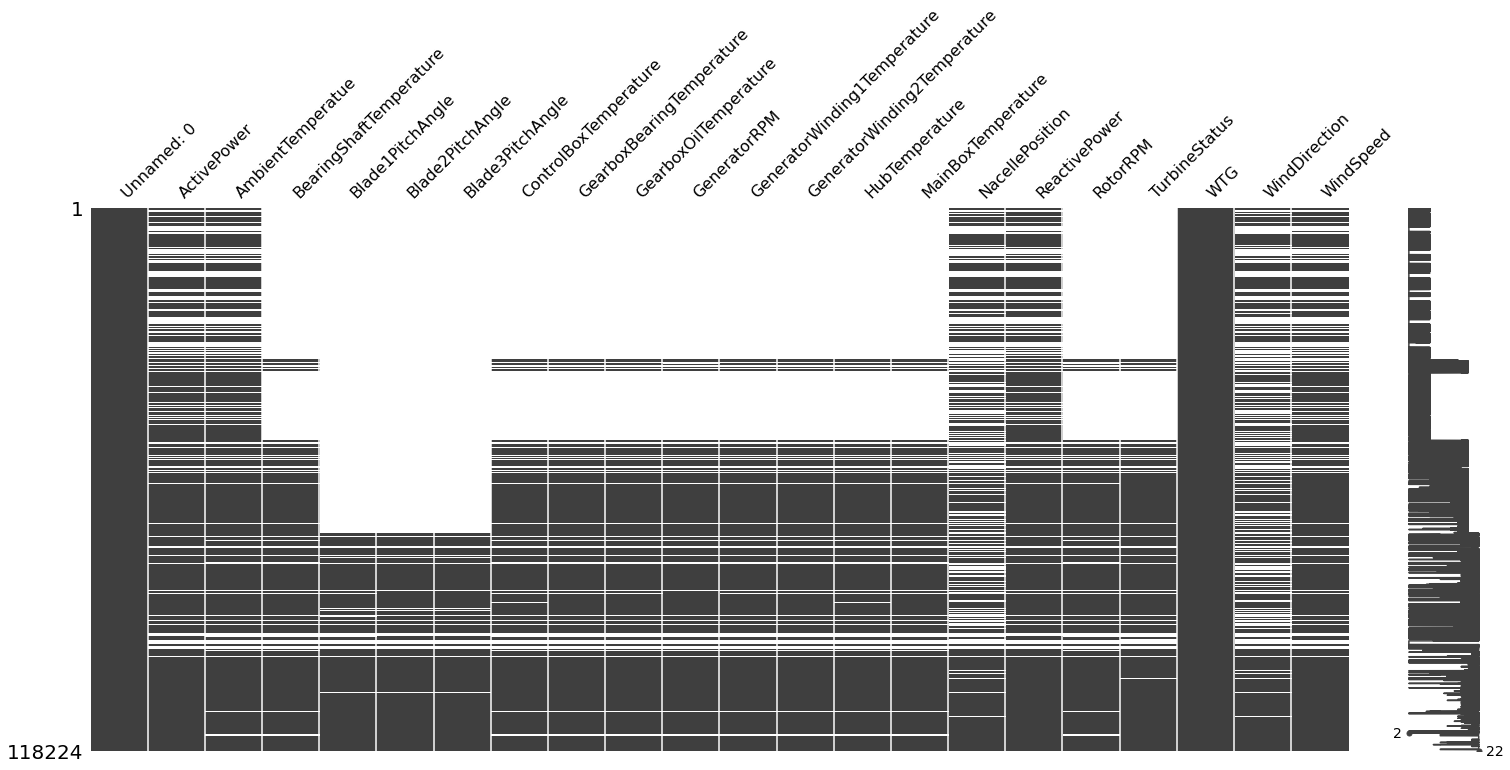

In [5]:
msno.matrix(turbine_df)

There is a weird shape to the data on several of the columns. About halfway down the data, most of the values fill in. The blade pitch values fill in furthest down in the data. 

As I do the analysis, I will run the predictive models with two different data sets. One will use the data, the values start to be recorded, and the second will be when the majority of other features start being recorded. 

About three-fourths of the way down the data, there are several rows where the data appears blank across all columns. I'll filter that data out as well to improve results. I expect there to be times when values go zero, like when the wind isn't blowing. But, incomplete data could negatively impact the model and will be eliminated.

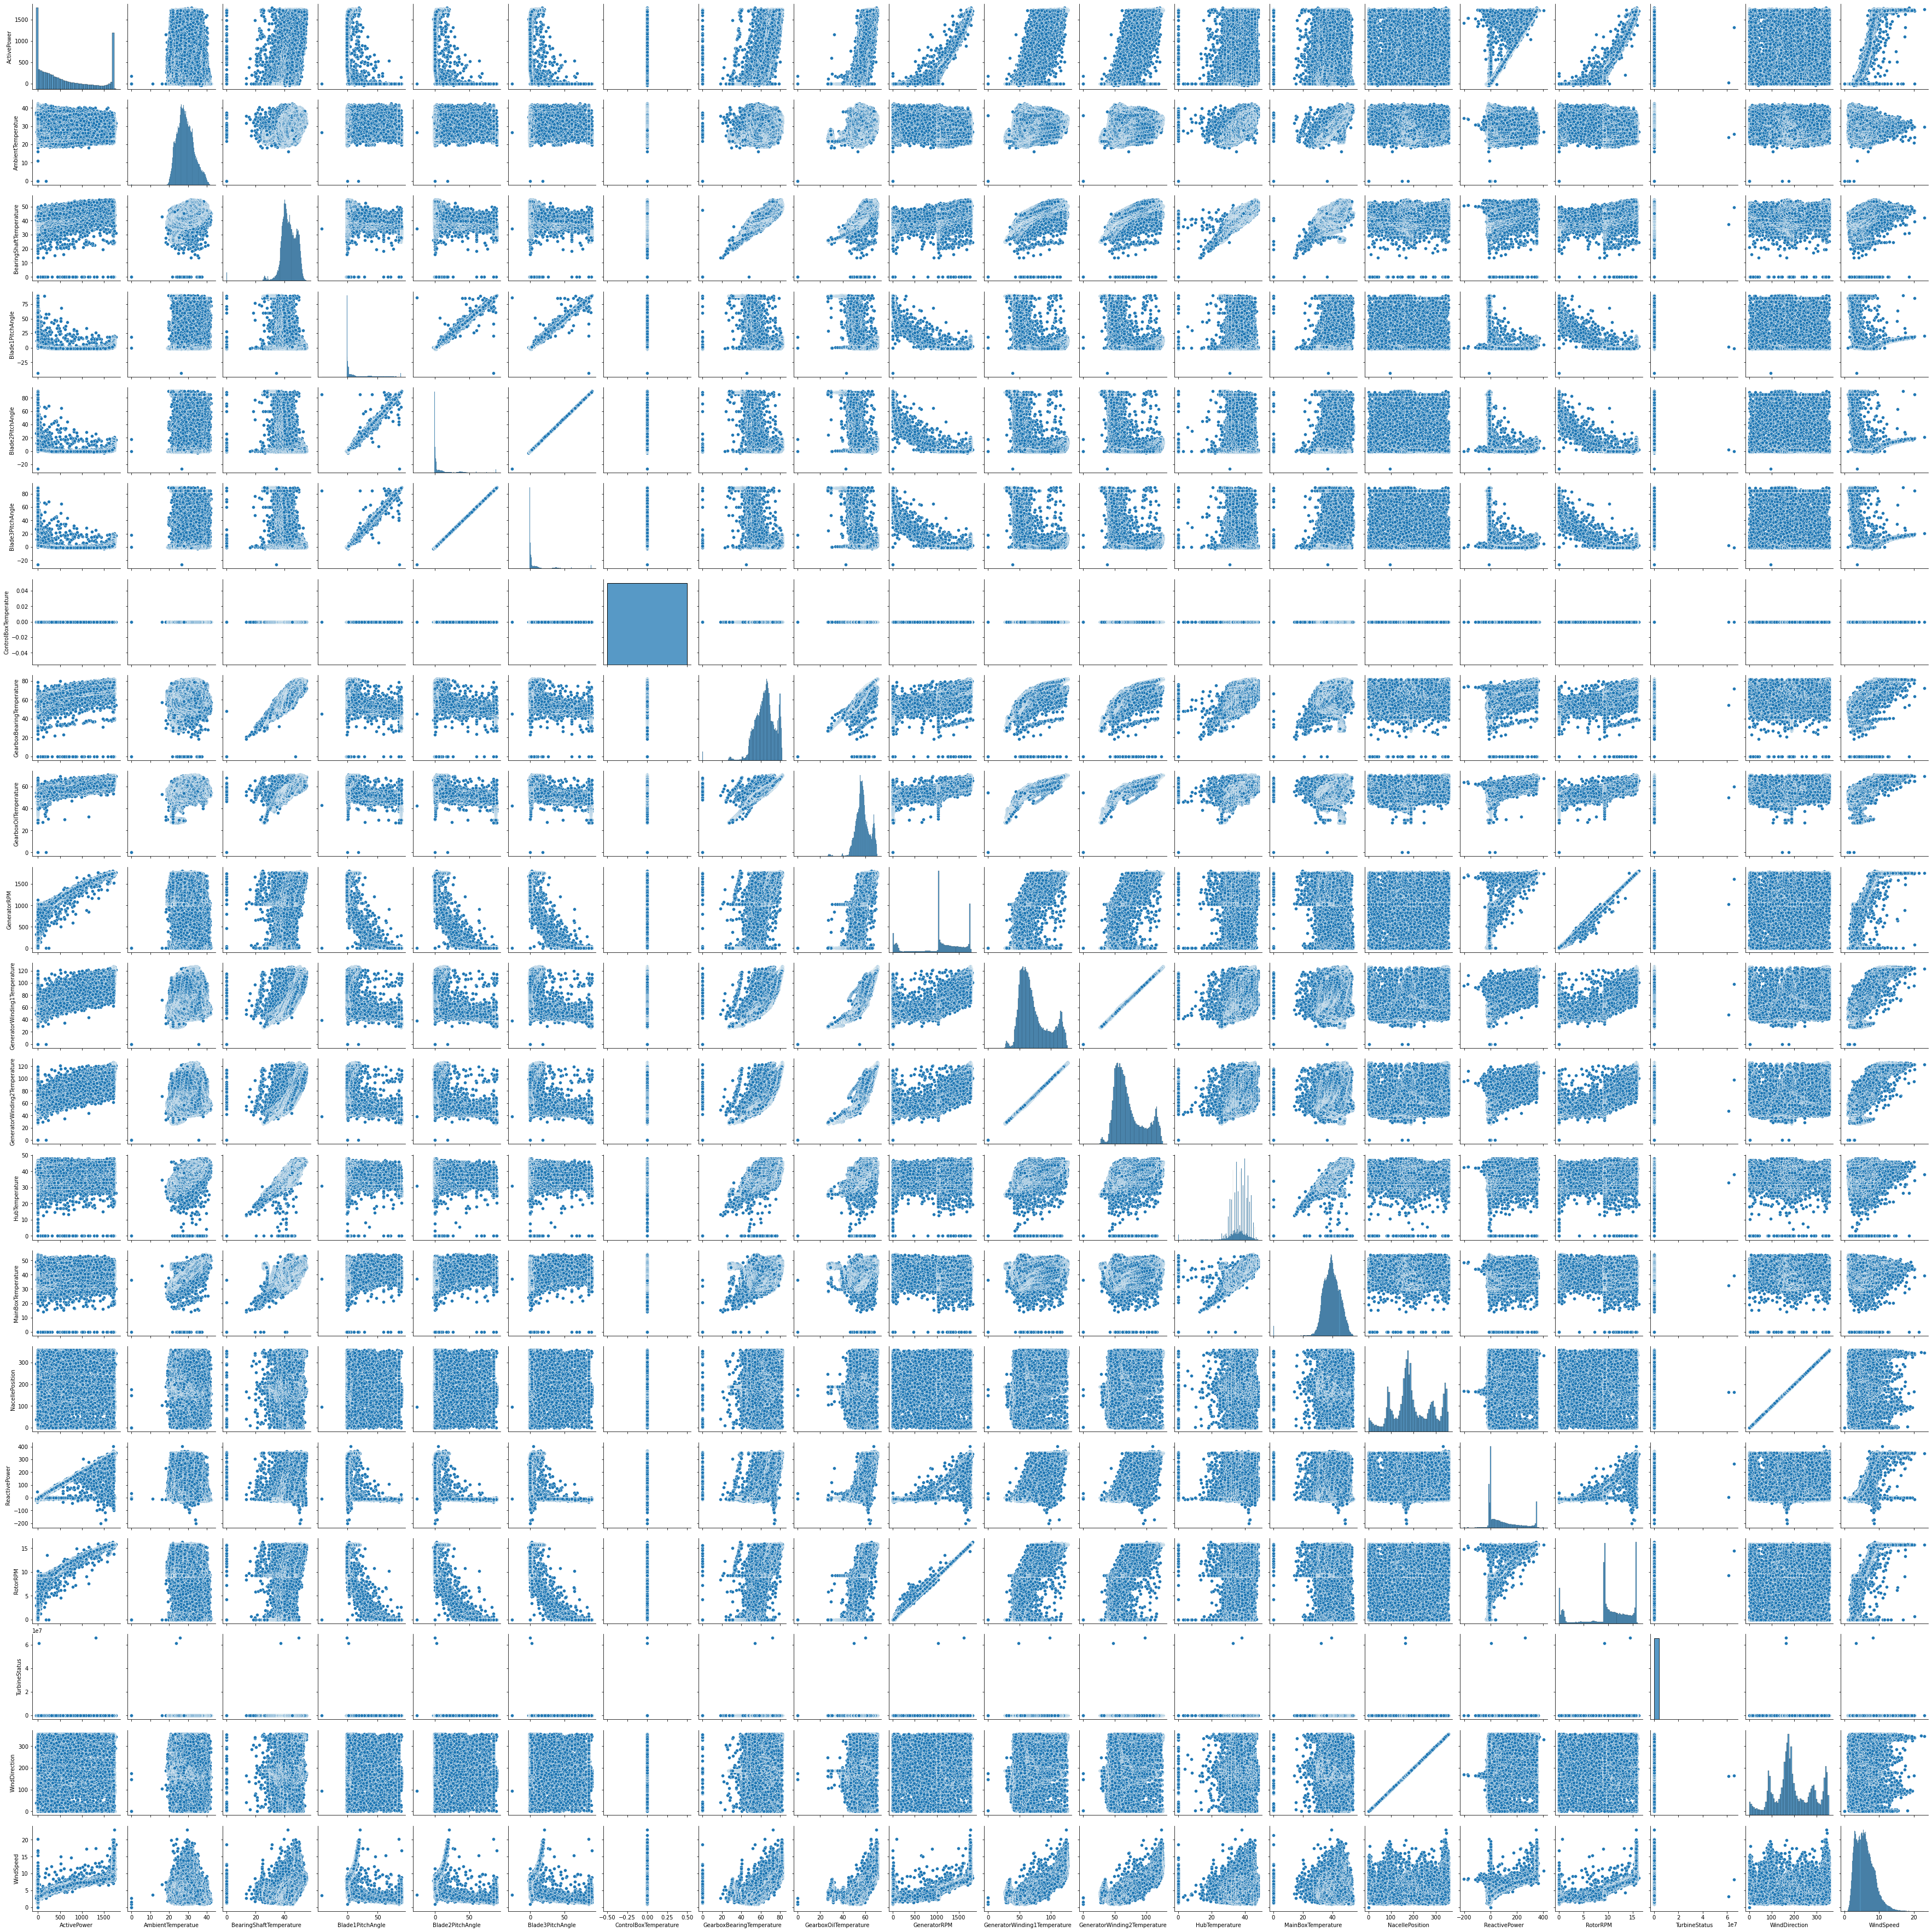

In [6]:
sns.pairplot(turbine_df)

I like using this plotting to get a sense of the data shape. It is small and hard to read, but I'll plot out individual data sets when doing deeper data analysis. Even by inspection, I can see some data is right-shifted, other data has several spikes, and the power data in the top left has a big peak at the start and end of the graph that will need further exploring. 

In [7]:
print(turbine_df['WTG'].unique())
print(turbine_df['TurbineStatus'].unique())

['G01']
[          nan 0.0000000e+00 2.0000000e+00 1.0000000e+00 7.6800000e+02
 1.0240000e+03 9.6000000e+02 6.1500000e+02 1.6400000e+02 1.4800000e+02
 4.8600000e+02 7.5200000e+02 9.1000000e+02 9.5100000e+02 2.5600000e+03
 1.0240000e+04 8.1920000e+03 1.6384000e+04 1.7270000e+03 2.0600000e+02
 5.1300000e+02 2.7100000e+02 3.0900000e+02 5.3000000e+01 5.1200000e+02
 9.2200000e+02 9.6700000e+02 8.7100000e+02 3.4300000e+02 9.7300000e+02
 9.6400000e+02 7.6900000e+02 5.6000000e+01 3.0000000e+00 5.8000000e+01
 2.7000000e+01 2.8500000e+02 4.7800000e+02 1.8100000e+02 3.3000000e+01
 2.2000000e+02 3.5100000e+02 7.8000000e+01 1.3500000e+02 5.2000000e+01
 2.4500000e+02 1.9300000e+02 1.2900000e+02 1.5400000e+02 1.0400000e+02
 4.0000000e+00 5.4700000e+02 7.5620000e+03 2.7000000e+02 2.8000000e+01
 3.4200000e+02 1.1500000e+02 7.5000000e+01 5.5000000e+01 5.7000000e+01
 3.8000000e+01 4.5500000e+02 3.5900000e+02 4.8500000e+02 4.8200000e+02
 3.9800000e+02 4.8400000e+02 4.1000000e+02 1.8000000e+02 2.8800000e+0

The WTG column only contains one code that appears unimportant. It'll be removed as part of the data cleaning. 

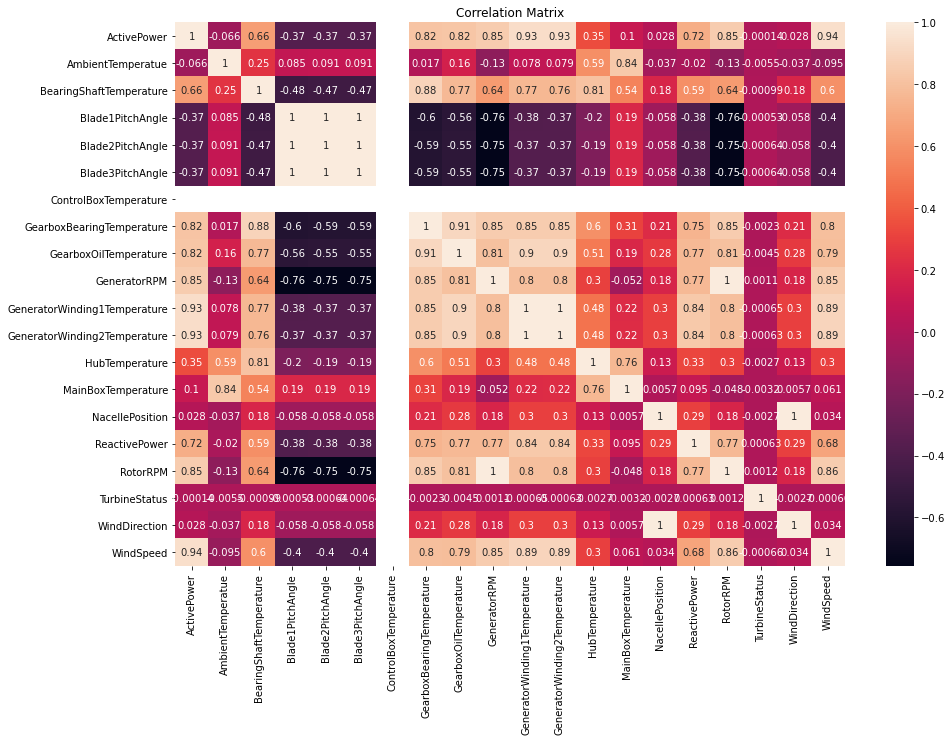

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(turbine_df.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()
plt.clf()

The correlation matrix is useful for getting a high-level intuition on relationships. Right from the start, it is clear that multiple values are closely related. Some are obvious, like wind speed and rotor RPM. Others are less correlated than I would have expected. For example, the main box temperature has almost no connection to the power output, when I anticipated the heat generated from power production would more closely correlate. Instead, there is virtually no correlation. 

The wind blade angles are all perfectly correlated with each other. The pitch of one blade is the pitch of all three blades. The rotor and generator are also perfectly correlated. This also makes sense given both rotate together at the same rate given they are physically coupled together. The same holds for the Nacel position and wind direction. As the wind changes, so does the Nacel position. 

While all of these are interesting correlations, the blade position is weakly negatively correlated from quick inspection. The Nacel position is almost not correlated at all. The RPMs do have a strong initial correlation. 

As further data cleaning is completed, it will be interesting to see how these values change when the NAN values are removed. 

### Purge Bad Data and Cleaning

The first thing I want to do is split the date and time apart. The time has seconds data that isn't needed, and there is a +00:00 data that can also be cleaned. Having it broken out by date and hour will allow for the day over day and week over week comparisons. 

In [9]:
turbine_df['Date'] = turbine_df['Unnamed: 0'].apply(lambda x: x.split(' ')[0])
turbine_df['time_full'] = turbine_df['Unnamed: 0'].apply(
    lambda x: x.split(' ')[-1])
turbine_df['time_short'] = turbine_df['time_full'].apply(
    lambda x: x.split(':00+')[0])
turbine_df['Month1'] = turbine_df['Date'].apply(lambda x: x.split('-')[1])
turbine_df

Unnamed: 0  ActivePower  AmbientTemperatue  \
0       2017-12-31 00:00:00+00:00          NaN                NaN   
1       2017-12-31 00:10:00+00:00          NaN                NaN   
2       2017-12-31 00:20:00+00:00          NaN                NaN   
3       2017-12-31 00:30:00+00:00          NaN                NaN   
4       2017-12-31 00:40:00+00:00          NaN                NaN   
...                           ...          ...                ...   
118219  2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220  2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221  2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222  2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223  2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                           NaN               NaN               NaN   
1                           NaN               NaN               NaN   
2                           NaN               NaN               NaN   
3                           NaN               NaN               NaN   
4                           NaN               NaN               NaN   
...                         ...               ...               ...   
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0                    NaN                    NaN                        NaN   
1                    NaN                    NaN                        NaN   
2                    NaN                    NaN                        NaN   
3                    NaN                    NaN                        NaN   
4                    NaN                    NaN                        NaN   
...                  ...                    ...                        ...   
118219          1.950088                    0.0                  59.821165   
118220          2.136732                    0.0                  59.142038   
118221          2.139664                    0.0                  58.439439   
118222          2.009781                    0.0                  58.205413   
118223          1.933124                    0.0                  58.581716   

        GearboxOilTemperature  ...  ReactivePower  RotorRPM  TurbineStatus  \
0                         NaN  ...            NaN       NaN            NaN   
1                         NaN  ...            NaN       NaN            NaN   
2                         NaN  ...            NaN       NaN            NaN   
3                         NaN  ...            NaN       NaN            NaN   
4                         NaN  ...            NaN       NaN            NaN   
...                       ...  ...            ...       ...            ...   
118219              55.193793  ...      13.775785  9.234004            2.0   
118220              54.798545  ...       8.088928  9.229370            2.0   
118221              54.380456  ...       4.355978  9.236802            2.0   
118222              54.079014  ...      12.018077  9.237374            2.0   
118223              54.080505  ...      14.439669  9.235532            2.0   

        WTG  WindDirection  WindSpeed        Date       time_full  time_short  \
0       G01            NaN        NaN  2017-12-31  00:00:00+00:00       00:00   
1       G01            NaN        NaN  2017-12-31  00:10:00+00:00       00:10   
2       G01            NaN        NaN  2017-12-31  00:20:00+00:00       00:20   
3       G01            NaN        NaN  2017-12-31  00:30:00+00:00       00:30   
4       G01            NaN        NaN  2017-12-31  00:40:00+00

As a quick check, I'll plot the counts of the time column to see if any data is missing. 

Total Value Count:  118224


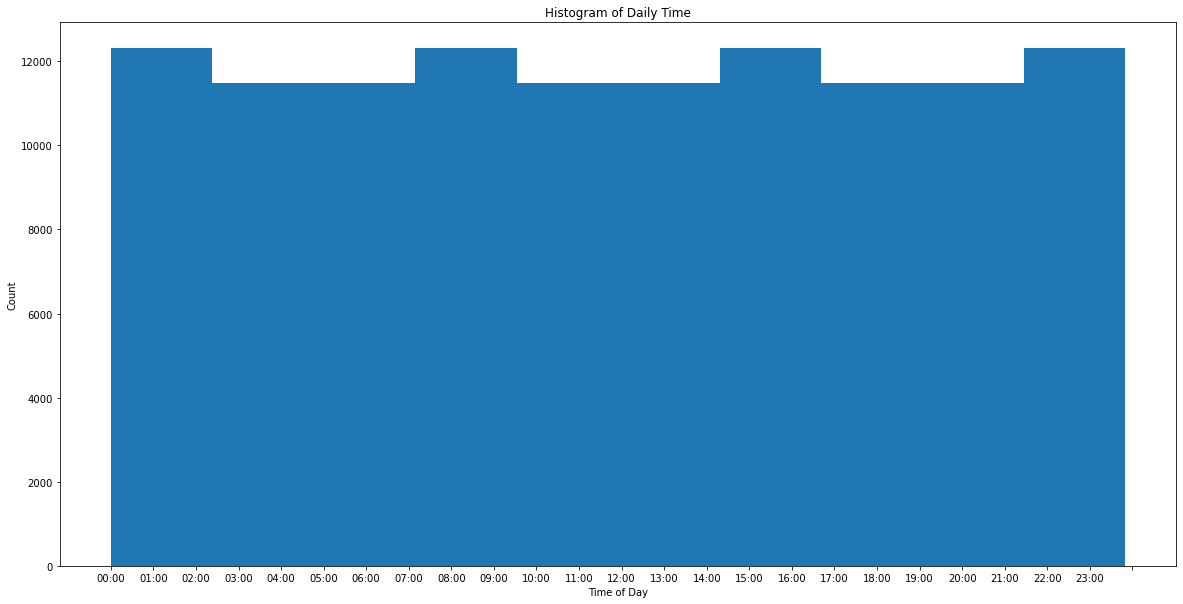

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

print('Total Value Count: ', turbine_df['time_short'].count())
time_array = turbine_df['time_short'].unique()
plt.title('Histogram of Daily Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
ax.set_xticks(np.arange(0, 150, 6))
ax.hist(turbine_df['time_short'])
plt.show()

The graph conveys that there are some missing times in the data. Without a continuous run of time, some of the conventions for a day of the week will get messed up later on in the data. I'll need to deal with this when I map days of the week. 

Now that the time column has been broken up between day and time. I am now going to cleanse all of the rows with no data. I am assuming this was either when the equipment was serviced, or data to the monitoring system was corrupted. 

In [11]:
# This code will find all of the NaN values and create a moving average based on a three hour window\
# or 18 interval lengths. It won't be a perfect measure, but the best indicator will be nearby values.
turbine_df_no_nan = turbine_df.fillna(0)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=12)
turbine_df_meaned = turbine_df_no_nan.rolling(window=indexer,
                                              min_periods=1).mean()

# turbine_df_meaned #Uncomment to see full dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   118224 non-null  float64
 1   AmbientTemperatue             118224 non-null  float64
 2   BearingShaftTemperature       118224 non-null  float64
 3   Blade1PitchAngle              118224 non-null  float64
 4   Blade2PitchAngle              118224 non-null  float64
 5   Blade3PitchAngle              118224 non-null  float64
 6   ControlBoxTemperature         118224 non-null  float64
 7   GearboxBearingTemperature     118224 non-null  float64
 8   GearboxOilTemperature         118224 non-null  float64
 9   GeneratorRPM                  118224 non-null  float64
 10  GeneratorWinding1Temperature  118224 non-null  float64
 11  GeneratorWinding2Temperature  118224 non-null  float64
 12  HubTemperature                118224 non-nul

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0          0.000000           0.000000                 0.000000   
1          0.000000           0.000000                 0.000000   
2          0.000000           0.000000                 0.000000   
3          0.000000           0.000000                 0.000000   
4          0.000000           0.000000                 0.000000   
...             ...                ...                      ...   
118219    52.482239          27.682769                45.469437   
118220    48.091682          27.722526                45.409014   
118221    50.511084          27.762408                45.345827   
118222    65.377732          27.863150                45.287718   
118223    68.664425          27.915828                45.231610   

        Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
0               0.000000          0.000000          0.000000   
1               0.000000          0.000000          0.000000   
2               0.000000          0.000000          0.000000   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
118219          1.599873          2.033878          2.033878   
118220          1.620924          2.054825          2.054825   
118221          1.593630          2.027523          2.027523   
118222          1.537337          1.971452          1.971452   
118223          1.499323          1.933124          1.933124   

        ControlBoxTemperature  GearboxBearingTemperature  \
0                         0.0                   0.000000   
1                         0.0                   0.000000   
2                         0.0                   0.000000   
3                         0.0                   0.000000   
4                         0.0                   0.000000   
...                       ...                        ...   
118219                    0.0                  58.837954   
118220                    0.0                  58.592151   
118221                    0.0                  58.408856   
118222                    0.0                  58.393564   
118223                    0.0                  58.581716   

        GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                    0.000000      0.000000                      0.000000   
1                    0.000000      0.000000                      0.000000   
2                    0.000000      0.000000                      0.000000   
3                    0.000000      0.000000                      0.000000   
4                    0.000000      0.000000                      0.000000   
...                       ...           ...                           ...   
118219              54.506463   1030.036402                     58.207328   
118220              54.334630   1030.077817                     57.994069   
118221              54.179992   1030.050263                     57.841424   
118222              54.079760   1030.006483                     57.745100   
118223              54.080505   1029.834789                     57.694813   

        GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
0                           0.000000        0.000000            0.000000   
1                           0.000000        0.000000            0.000000   
2                           0.000000        0.000000            0.000000   
3                           0.000000        0.000000            0.000000   
4                           0.000000        0.000000            0.000000   
...                              ...             ...                 ...   
118219                     57.277352       39.005427           36.171700   
118220                     57.059495       39.004551           36.095484   
118221                     56.895871       39.003815           36.017937   
118222                     5

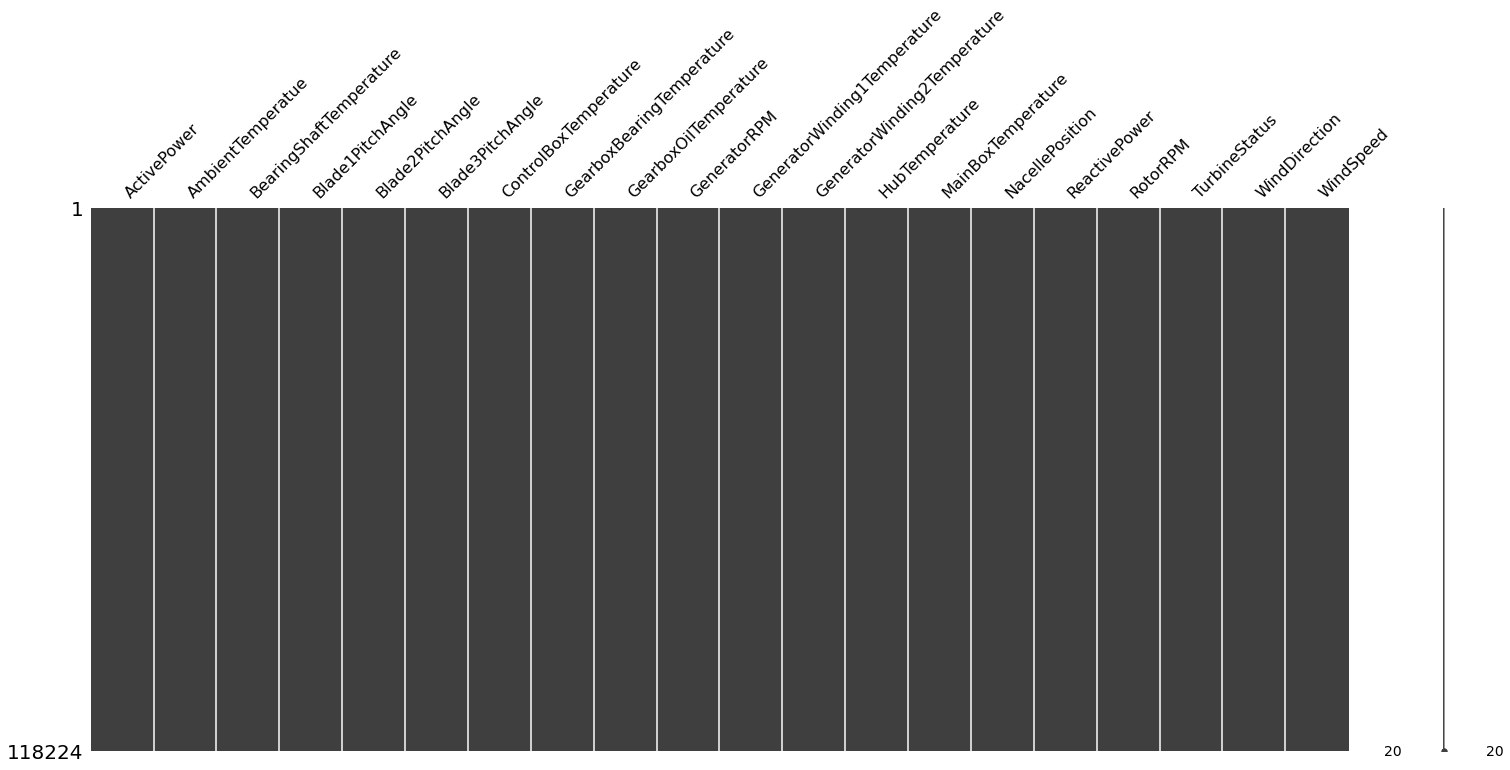

In [12]:
msno.matrix(turbine_df_meaned)
turbine_df_meaned.info()
turbine_df_meaned

The values now looks like what I expect, that the NaN values have been filled in with a moving weighted average function. 

Now I'll plot out what the active power looks like with the averaged values. 

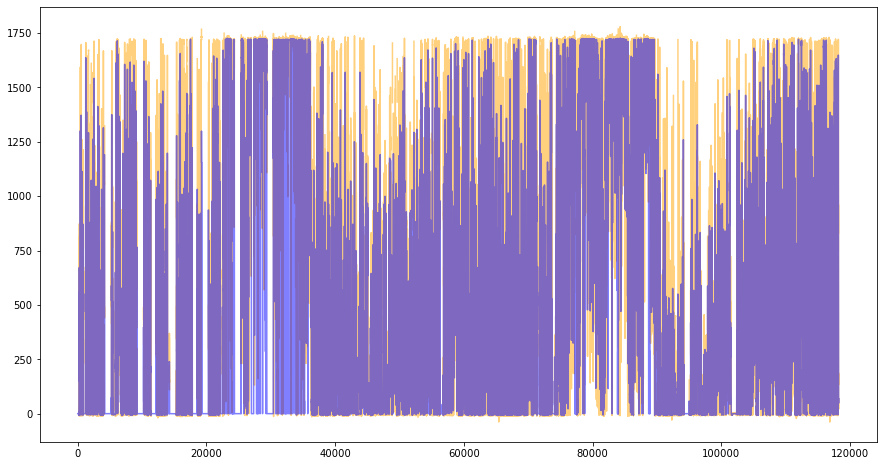

0.91648612353637


<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(turbine_df['ActivePower'], alpha=.5, color='orange')
plt.plot(turbine_df_meaned['ActivePower'], alpha=.5, color='blue')
plt.show()
plt.clf()
print(turbine_df['ActivePower'].corr(turbine_df_meaned['ActivePower']))

From the plot graph, it becomes apparent that the data clips out around 1700kW. It is also apparent there is a lot of instances where the power drops to zero. That is to be expected given the wind isn't always blowing. The overlay of the two plots is interesting to see the values filled in with averaged values. There are points in the graph where there is better predicted values. This will help with developing a better model where the other features have information but the active power is blank. This will support building a predictive model with values that are close to what it should be based on recent values. 

I could have spent more time creating a model that took into account the future and past values to do a better job of filling in the missing data. I didn't find a great pre-made function that could do that work. To further improve the model, work could be done to include future values to fill in NaN values using future and past values. 

In [14]:
columns = turbine_df_meaned.columns
#print(columns)
corr_matrix = []
for col in columns:
    corr_matrix.append(turbine_df[col].corr(turbine_df_meaned[col]))
for i in range(len(columns)):
    print('\nHeading: ', columns[i], "correlation: ", corr_matrix[i])


Heading:  ActivePower correlation:  0.91648612353637

Heading:  AmbientTemperatue correlation:  0.7877558730361202

Heading:  BearingShaftTemperature correlation:  0.6416616566654627

Heading:  Blade1PitchAngle correlation:  0.8358435196377209

Heading:  Blade2PitchAngle correlation:  0.8304993386971429

Heading:  Blade3PitchAngle correlation:  0.8304993386971429

Heading:  ControlBoxTemperature correlation:  nan

Heading:  GearboxBearingTemperature correlation:  0.7276288443285506

Heading:  GearboxOilTemperature correlation:  0.7169349936316999

Heading:  GeneratorRPM correlation:  0.8644665435256225

Heading:  GeneratorWinding1Temperature correlation:  0.9180077712480849

Heading:  GeneratorWinding2Temperature correlation:  0.9190685070361465

Heading:  HubTemperature correlation:  0.6636902693743878

Heading:  MainBoxTemperature correlation:  0.6996741638019367

Heading:  NacellePosition correlation:  0.6555877236832935

Heading:  ReactivePower correlation:  0.9270334559621335

He

The work done up to this point was to create values that can fill in for NAN values. With almost all of these values being continuous, a weighted exponential window developed values that can fill in for the NAN values. I'm only going to fill in values that are greater than .91 correlated. This way, the models built later will have more data for fitting. This approach will also be better than leaving the values as NAN or deleting the NaN values. 

It is clear from the original data that about half of the features do not show up until the data's midpoint. That will be worked out as I create the different dataframes further on in this work. 

The other advantage is these features are all highly correlated with power production. 

In [15]:
corr_columns = [
    'ActivePower', 'GeneratorWinding1Temperature',
    'GeneratorWinding2Temperature', 'ReactivePower', 'WindSpeed',
    'AmbientTemperatue', 'BearingShaftTemperature', 'Blade1PitchAngle',
    'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
    'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
    'MainBoxTemperature', 'NacellePosition', 'RotorRPM', 'HubTemperature',
    'WindDirection'
]
turbine_df_filled = turbine_df
for col in corr_columns:
    turbine_df_filled[col].update(turbine_df_meaned[col])

# turbine_df_filled #Uncomment to see full dataframe

# msno.matrix(turbine_df_meaned)
# msno.matrix(turbine_df_filled)

Now that there are values replaced for NaN. Now the different dataframes mentioned earlier can be created. 

In [16]:
turbine_df_full = turbine_df_filled[[
    'Date', 'time_short', 'ActivePower', 'AmbientTemperatue',
    'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
    'NacellePosition', 'ReactivePower', 'WindSpeed', 'Month1'
]].reset_index()

turbine_df_half = turbine_df_filled.loc[50000:].reset_index()
# turbine_df_half # uncomment to see full dataframe

So the first dataframe is easy to put together. The tougher part will be trying to find the point where the balance of the data is beyond the middle split in the data. To start, I'll plot the bearing shaft temperature as it is one of the features that starts later in the dataset. 

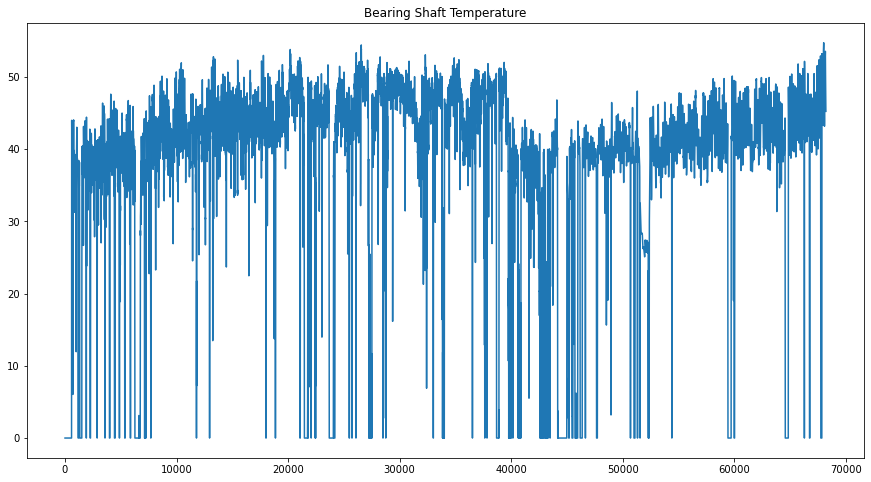

In [17]:
plt.figure(figsize=(15, 8))
plt.title('Bearing Shaft Temperature')
plt.plot(turbine_df_half['BearingShaftTemperature'])
# plt.xticks(range(len(turbine_df_half['BearingShaftTemperature'])),np.str(turbine_df_half['date']))
plt.show()

I'm sure I could have written a function to find the exact label where the data starts or opened the data in Excel to find the precise line this function starts recording data. But, the eyeball approach should be close enough. 

I've now got my two dataframes and can start doing an in-depth analysis of the data's shape to see how I further want to transform the data. 

# The Shape of Data

To start, I want to inspect the histogram further of my active power graph to understand the shape and see what pruning is needed. 

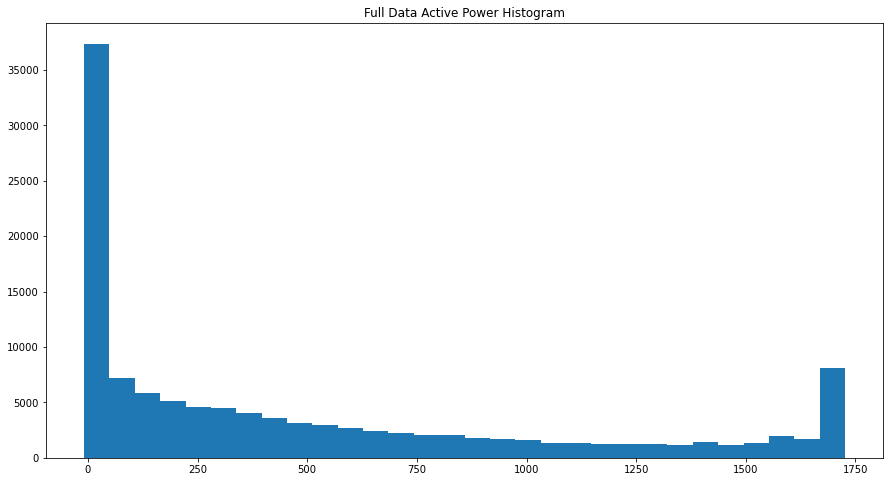

<Figure size 432x288 with 0 Axes>

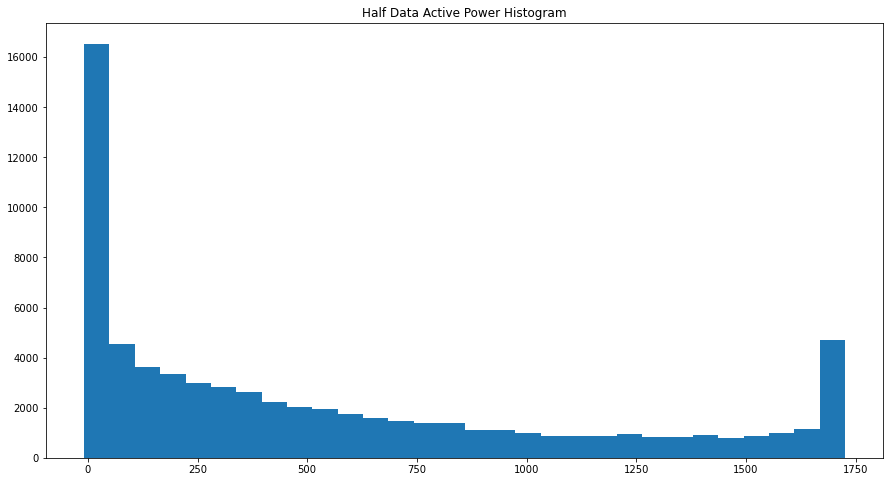

<Figure size 432x288 with 0 Axes>

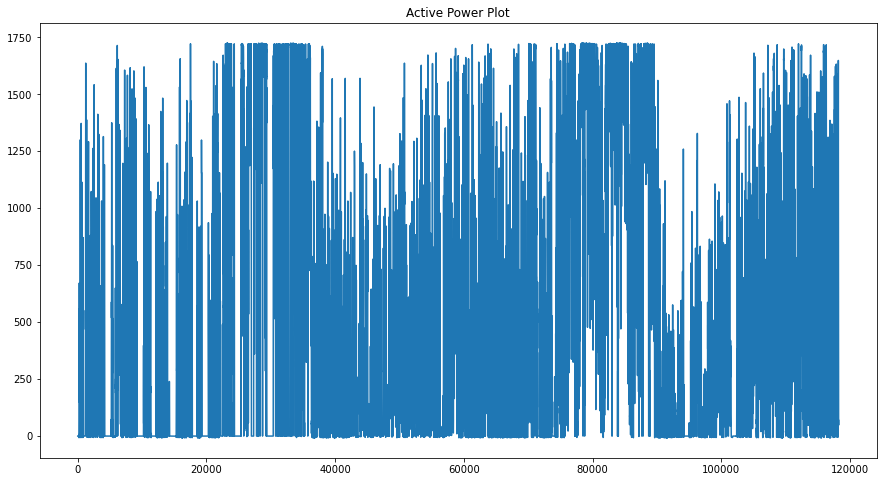

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15, 8))
plt.hist(turbine_df_full['ActivePower'], bins=30)
plt.title("Full Data Active Power Histogram")
plt.show()
plt.clf()

plt.figure(figsize=(15, 8))
plt.hist(turbine_df_half['ActivePower'], bins=30)
plt.title("Half Data Active Power Histogram")
plt.show()
plt.clf()

plt.figure(figsize=(15, 8))
plt.plot(turbine_df_full['ActivePower'])
plt.title('Active Power Plot')
plt.show()
plt.clf()

So there is a large bump at the end of the histograms. It looks like it starts at around 1700. Lets see how much of the data is at the end of the histogram. 

In [19]:
print( 'Number of values above 7000:',
    turbine_df_full.ActivePower[turbine_df_full['ActivePower'] > 1700].count())
print('Percentage of values above 7000 from the total: ',
    turbine_df_full.ActivePower[turbine_df_full['ActivePower'] > 1700].count()
    / len(turbine_df_full['ActivePower']) * 100)

Number of values above 7000: 6754
Percentage of values above 7000 from the total:  5.712884016781702


So 6754 values are at the end or roughly 5.7% of the the data in the program. Looking at my correlation maxtrix, I would expect my wind speed to highly correlate with the higher power output given the correlation is .94. First I'll look at the wind speed histogram to get a sense of the shape of data. 

I'm going to overlay the wind speed plot with the active power. I'll use two different scales to try to make the comparison on the scales easier. 

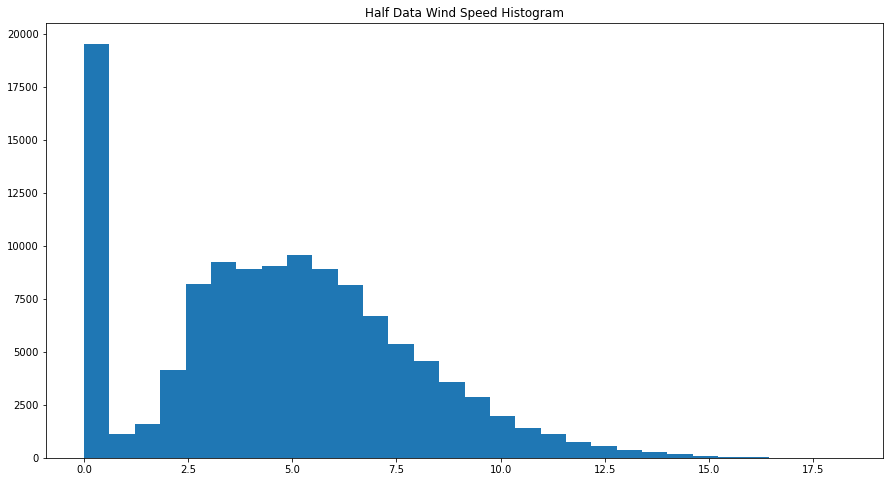

<Figure size 432x288 with 0 Axes>

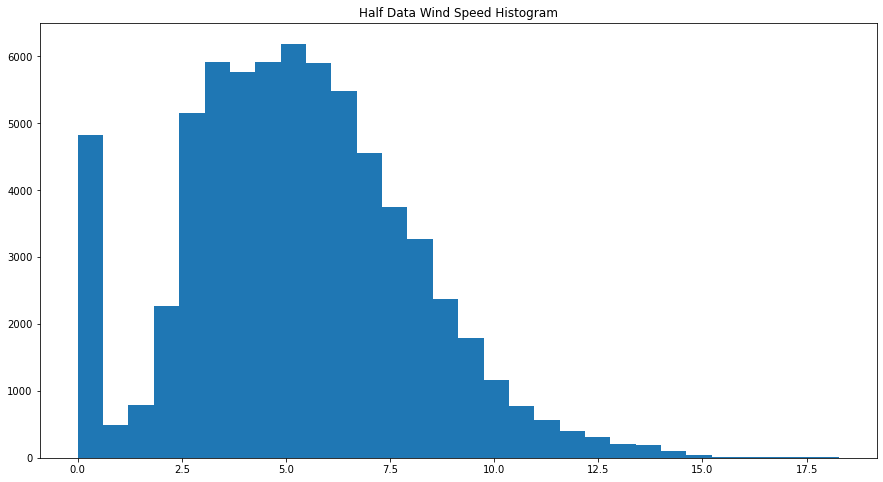

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(15, 8))
plt.hist(turbine_df_full['WindSpeed'], bins=30)
plt.title("Half Data Wind Speed Histogram")
plt.show()
plt.clf()

plt.figure(figsize=(15, 8))
plt.hist(turbine_df_half['WindSpeed'], bins=30)
plt.title("Half Data Wind Speed Histogram")
plt.show()
plt.clf()

So the values of wind speed fall off at higher levels. There isn't a corresponding spike in output power with the wind speed. It would be good to further investigate the model before determining if the data is bad. Also notice that the wind and power output both share a large percentage of time at zero with the large hump around the zero mark. The imbalance will make for an interesting time when it comes to fit the data. 

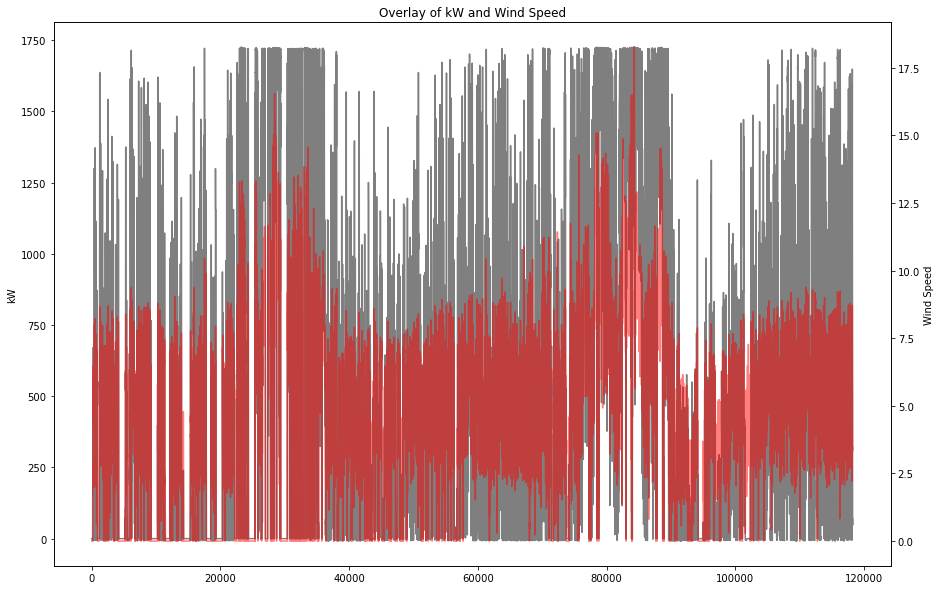

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = plt.twinx()

plt.title('Overlay of kW and Wind Speed')
ax1.plot(turbine_df_full['ActivePower'], color='black', alpha=.5)
ax1.set_ylabel('kW')
ax2.plot(turbine_df_full['WindSpeed'], color='red', alpha=.5)
ax2.set_ylabel('Wind Speed')
plt.show()

Looking at the overlay, it looks like as the wind speed gets above 11 to 12 mph for the kW to max out. This will skew the data slightly as we see in the histogram is we have a max output kW while the wind speed can go much higher. For fun, i'll create a small dataframe to see what wind speed will cause the system to max out. The next piece is a bit of digression but might be good for developing an intuition on the data. 

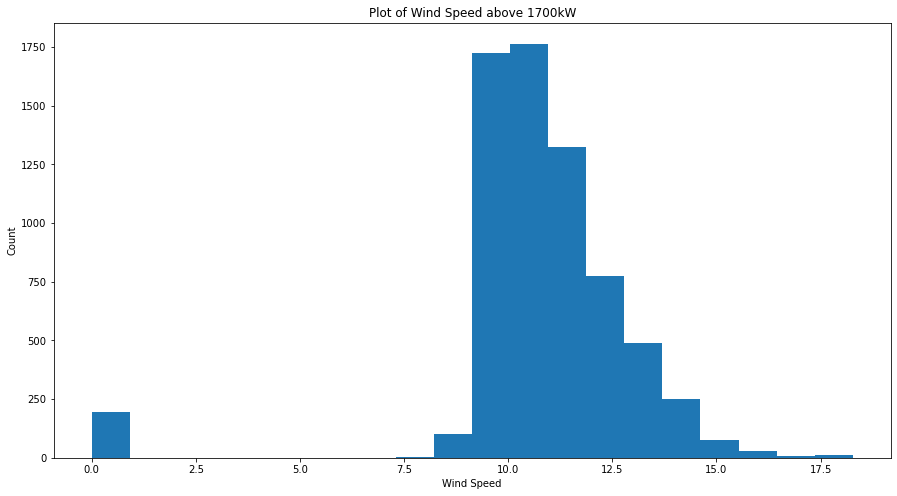

In [22]:
df_1750 = turbine_df_full[turbine_df_full['ActivePower'] > 1700]
# df_1750

plt.figure(figsize=(15, 8))
plt.title('Plot of Wind Speed above 1700kW')
plt.hist(df_1750['WindSpeed'], bins=20)
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()

So it looks like any time the wind speed gets above ten mph. It will be interesting to see how the learning models handle the higher wind speed level while the kW is maxed out. 

This does indicate I shouldn't prune the spike at the end of the kW histogram. It'll skew the data but should be included to reflect the limits of the machine. 

Now I want to take a look at the shape of the other trends in the data. To speed up the review, I will try to do a violin plot with each feature against active power. To make the comparison easier, I'll normalize the data for each feature. There are different ways to normalize the data. I chose a basic normalization to get a sense of the data shape. With the final data model build, I'll apply more exotic normalization techniques and fix skew in the data. 

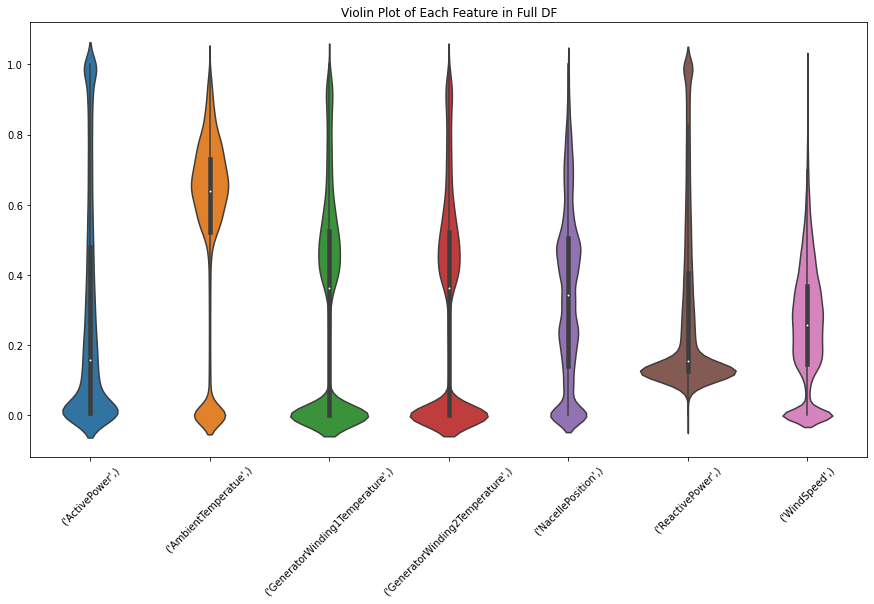

<Figure size 432x288 with 0 Axes>

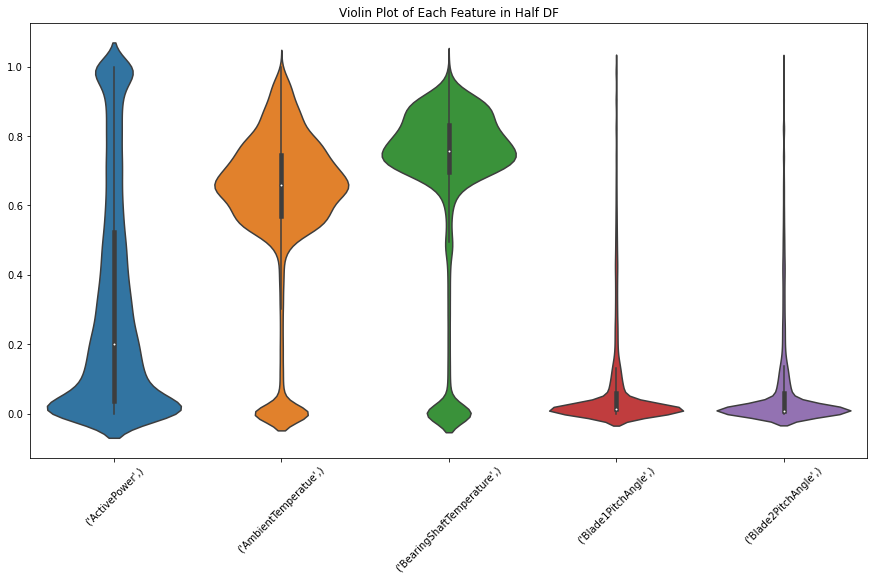

<Figure size 432x288 with 0 Axes>

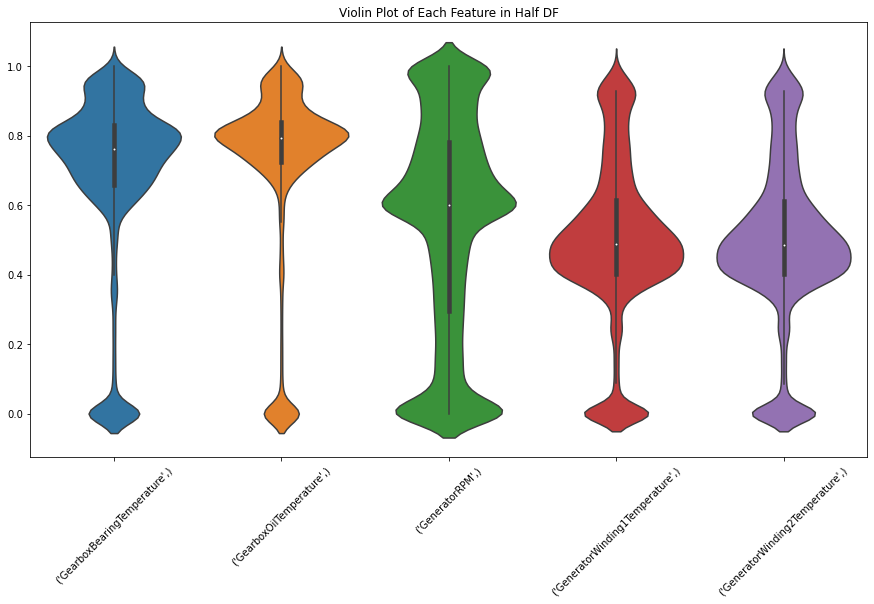

<Figure size 432x288 with 0 Axes>

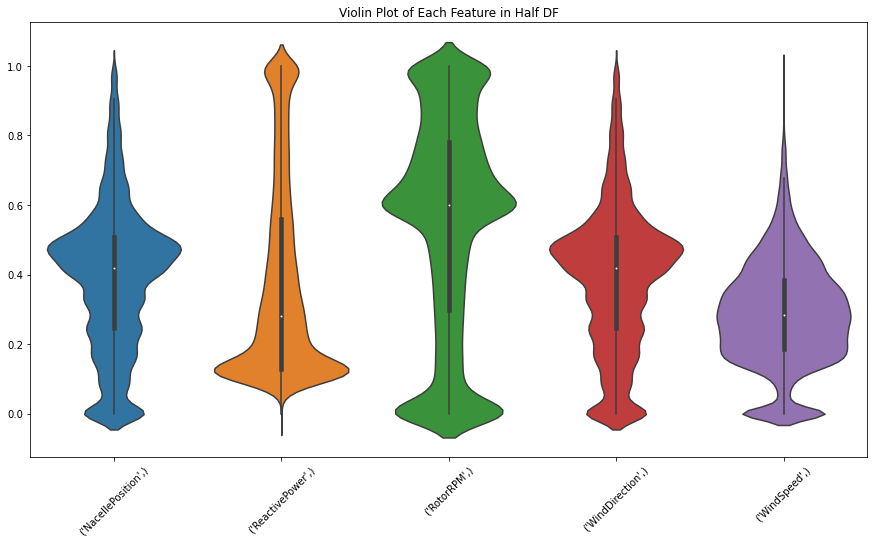

<Figure size 432x288 with 0 Axes>

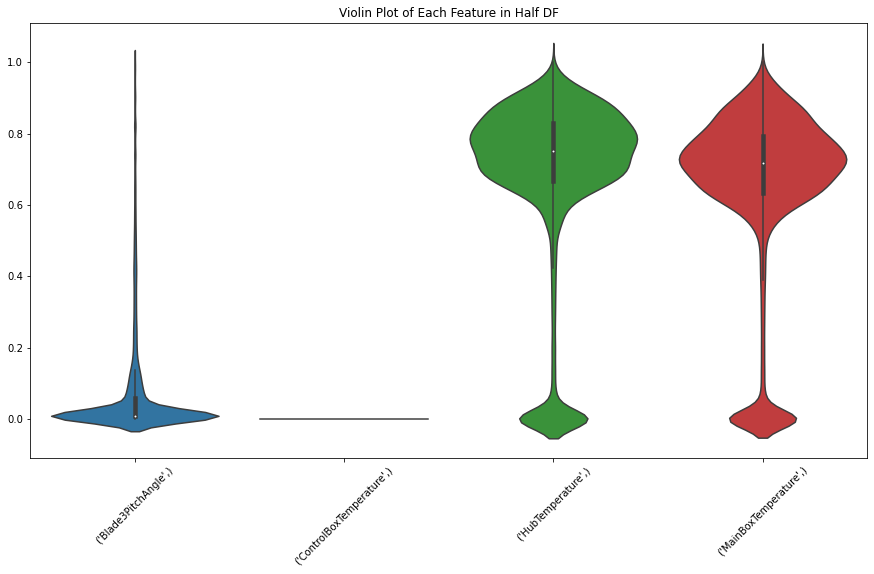

<Figure size 432x288 with 0 Axes>

In [23]:
features = [
    'ActivePower', 'AmbientTemperatue', 'GeneratorWinding1Temperature',
    'GeneratorWinding2Temperature', 'NacellePosition', 'ReactivePower',
    'WindSpeed'
]

# Listed out the features to strip out the date and time data
turbine_df_mod = turbine_df_full[features]
scaler = MinMaxScaler()
scaler.fit(turbine_df_mod)  # scale the values from 0 to 1
# transform the scales and put into a data frame
turbine_df_full_norm = pd.DataFrame(scaler.transform(turbine_df_mod))
turbine_df_full_norm.columns = [features]  # Put column headings back on data

turbine_df_full_norm.head()

plt.figure(figsize=(15, 8))
plt.title('Violin Plot of Each Feature in Full DF')
plt.xticks(rotation=45)
sns.violinplot(data=turbine_df_full_norm)
plt.show()
plt.clf()

# Reapeat the same thing but for the turbine half data
features2 = [[
    'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
    'Blade1PitchAngle', 'Blade2PitchAngle'
],
    [
    'GearboxBearingTemperature', 'GearboxOilTemperature',
    'GeneratorRPM', 'GeneratorWinding1Temperature',
    'GeneratorWinding2Temperature'
],
    [
    'NacellePosition', 'ReactivePower', 'RotorRPM',
    'WindDirection', 'WindSpeed'
],
    [
    'Blade3PitchAngle', 'ControlBoxTemperature', 'HubTemperature',
    'MainBoxTemperature'
]]
for feat in features2:
    turbine_df_mod2 = turbine_df_half[feat] #create a new dataframe
    scaler = MinMaxScaler() #Create scaler for 
    scaler.fit(turbine_df_mod2)  # scale the values from 0 to 1
    # transform the scales and put into a data frame
    turbine_df_half_norm = pd.DataFrame(scaler.transform(turbine_df_mod2)) # use normalization and place in new dataframe
    turbine_df_half_norm.columns = [feat] # add back the headings

    #Create new violin plots
    plt.figure(figsize=(15, 8))
    plt.title('Violin Plot of Each Feature in Half DF')
    plt.xticks(rotation=45)
    sns.violinplot(data=turbine_df_half_norm, scale='width')
    plt.show()
    plt.clf()

features3 = [
    'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
    'Blade1PitchAngle', 'Blade2PitchAngle', 'GearboxBearingTemperature',
    'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
    'GeneratorWinding2Temperature', 'NacellePosition', 'ReactivePower',
    'RotorRPM', 'WindDirection', 'WindSpeed', 'Blade3PitchAngle',
    'ControlBoxTemperature', 'HubTemperature', 'MainBoxTemperature'
]

Looking at the different shapes of the violin plots, some options have a similar distribution profile to the out put power. Reactive power and active power are almost identical, which is expected given they share the relationship through the power triangle. Rotor RPM and windspeed also have a similar distribution with active power. Most of the temperature distributions are identical but don't have as strong of a relationship. The blade position is very closely distributed around one point, and the control box temperature doesn't seem to have any good data. I'll remove that from the final dataset for putting together a better dataset for creating a fit. 

So let's take stock of what has been done up to this point and the story behind it. First, we want to know how much power this wind turbine will output. We can see that the max power is 1700kW to 1750kW. The best  predictor of power output is the wind speed followed closely by generator and rotor RPM. Since all of those items are electromechanically connected, this makes sense that they would be highly correlated together. 

Other items like wind direction, turbine status, and turbine blade position do not have correlation to power output or may even be slightly uncorrelated. 

Before building the machine learning model, it would be interesting to break down power output with a heat map by day, week, month, and year to see if there is seasonality to the power output. 

# As Hot As a Heat Map

I want to get a better feel for minutes, hourly, weekly, and monthly/seasonal effects on power production. It will be great to understand how the system performs using the different metrics. 

### Minute and Hourly Data Intervals


It would be good to plot the power output over 24 hours. To do that, we need to group the different time intervals. Then, a quick histogram with variance bars will show the shape of the performance over the day.

The data is broken down into ten-minute increments and will be plotted, denoting the hours. This way, we can see if there is a trend at the minute and hour level.

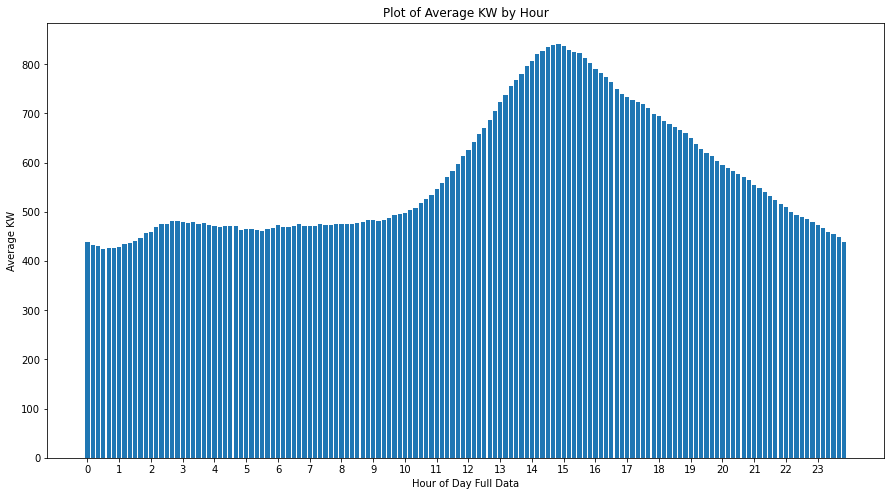

<Figure size 432x288 with 0 Axes>

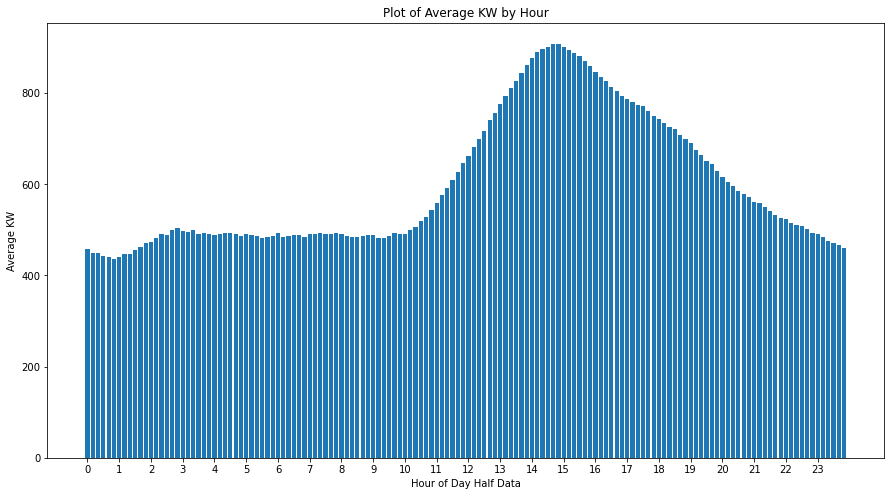

<Figure size 432x288 with 0 Axes>

In [24]:
time_df_full = turbine_df_full[turbine_df_full['ActivePower'] > 0].pivot(
    columns='time_short', index='Date',
    values='ActivePower').mean().reset_index()
time_df_half = turbine_df_half[turbine_df_half['ActivePower'] > 0].pivot(
    columns='time_short', index='Date',
    values='ActivePower').mean().reset_index()

# Set ticks for plot
time_tick = []
hour_label = []
time_tick.extend(range(0, 144, 6))
hour_label.extend(range(0, 24))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(range(len(time_df_full['time_short'])), time_df_full[0])
ax.set_xticks(time_tick)
ax.set_xticklabels(hour_label)
ax.set_xlabel('Hour of Day Full Data')
ax.set_ylabel('Average KW')
ax.set_title('Plot of Average KW by Hour')
plt.show()
plt.clf()

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(range(len(time_df_half['time_short'])), time_df_half[0])
ax.set_xticks(time_tick)
ax.set_xticklabels(hour_label)
ax.set_xlabel('Hour of Day Half Data')
ax.set_ylabel('Average KW')
ax.set_title('Plot of Average KW by Hour')
plt.show()
plt.clf()

# Uncomment to see plot with large error bars
#plt.figure(figsize = (15,8))
#plt.bar(range(len(time_df['time_short'])), time_df[0], yerr = time_df['StandardDev'])
# plt.show()
# plt.clf()

This graph turned out to be more interesting than I expected. There is a clear trend that there is a high average power output in the afternoon between twelve PM and seven PM. I understand that wind production is better at night, given that changes in temperature cause the wind to blow. Here wind production on average is strongest in the afternoon. Without knowing the location of the wind turbine, there may be a local impact with geographical conditions improving wind production in the afternoon. 

I attempted to make a bar plot with error bars, but my results were less than impressive. I calculated the standard deviation of the average power, and many of the error bars were below zero. Over the course of the plot, the standard deviation was well above +/- 600kW. So even though the average produces a nice plot with a clear trend, there is a bunch of noise in the system. 

Now for fun, I'll check if there is any trend in weekly data by creating a heat map. 

### Weekly Heat Map

To start, my current data doesn't contain any information by day of the week. So it would make sense to map days of the week to the existing data. From there, I can do a pivot table to filter the data by day and by time. From there, a heat map can be created. 

The first entry is December 31, 2017, which was a Saturday. The mapping will start on a Saturday and increment from there. I'll map this information in a new Date column. Each day has 120 entries for time. I'll fill up an array with the dates until I hit 118224, the total number of entries for the data set. I know from the earlier plot that I have some missing dates and times. Thankfully, the Timestamp function will map the day and month based on the date given. I will not try to fill in the missing data as I am assuming either that data was corrupted or the equipment was out for repairs. This would mean that there isn't any data to approximate and can be ignored.

Thinking ahead, my next section is going to be filtering by month. I am going to go along with a clean-up day of the week and month now. 

Instead of mapping the month, I'll parse the information and create a new Month column.  

In [25]:
turbine_df_full['Day'] = turbine_df_full['Date'].apply(
    lambda x: pd.Timestamp(x).day_name())
turbine_df_half['Day'] = turbine_df_half['Date'].apply(
    lambda x: pd.Timestamp(x).day_name())
turbine_df_full['Month'] = turbine_df_full['Date'].apply(
    lambda x: pd.Timestamp(x).month_name())
turbine_df_half['Month'] = turbine_df_half['Date'].apply(
    lambda x: pd.Timestamp(x).month_name())
turbine_df_full['Month1'] = turbine_df_full['Month1']
turbine_df_half['Month1'] = turbine_df_half['Month1']

Now I'll do something similar to the hours data, except this time I'll create a pivot table that takes into account the days of the week over a 24 hour period instead of an average of all days of the week. A heat map will be best for displaying the data to get a sense of the values. 

Text(0.5, 1.0, 'Heatmap of Power by Day and Hour')

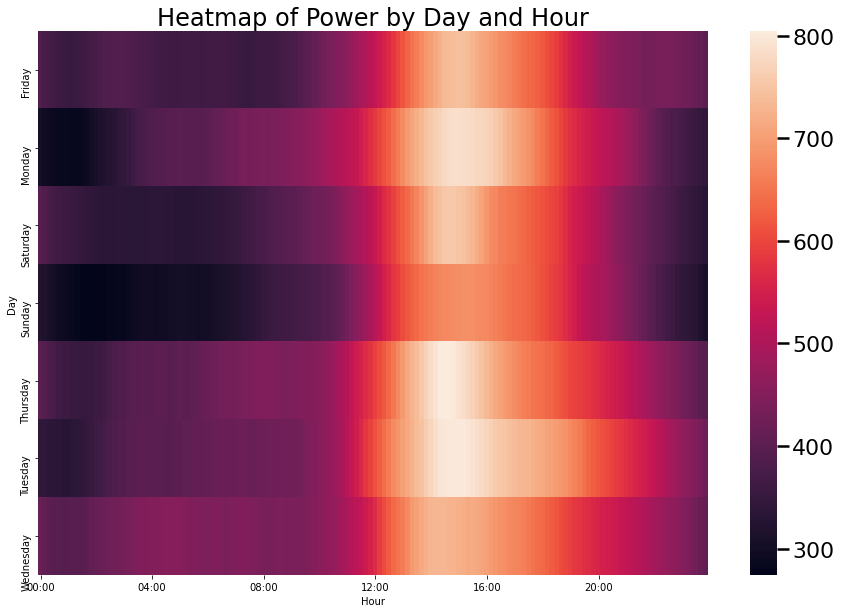

In [26]:
week_heat = turbine_df_full.pivot_table(columns='time_short',
                                        index='Day',
                                        values='ActivePower',
                                        aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.set_context('poster')
sns.heatmap(week_heat, xticklabels=24, yticklabels=True)
ax.set_xlabel('Hour')
ax.set_title('Heatmap of Power by Day and Hour')

From the heat map, a general comment can be said that it doesn't matter what day of the week we are dealing with. The afternoon is the common day of the week to see the highest level of power output. It does appear that power output is the lowest on Sunday and Monday mornings. This could be the time maintenance is being taken on the equipment resulting in lower power levels. Further questioning would need to be provided by the data provider to see if that is an accurate assessment.

I chose not to include the data in the plot as I have small intervals in the plot, and the text of values would be tiny. Instead, the colors make it easy to see at a glance what level of power output is available. 

### Production by Month

Next, I'll plot a histogram of the production by month.

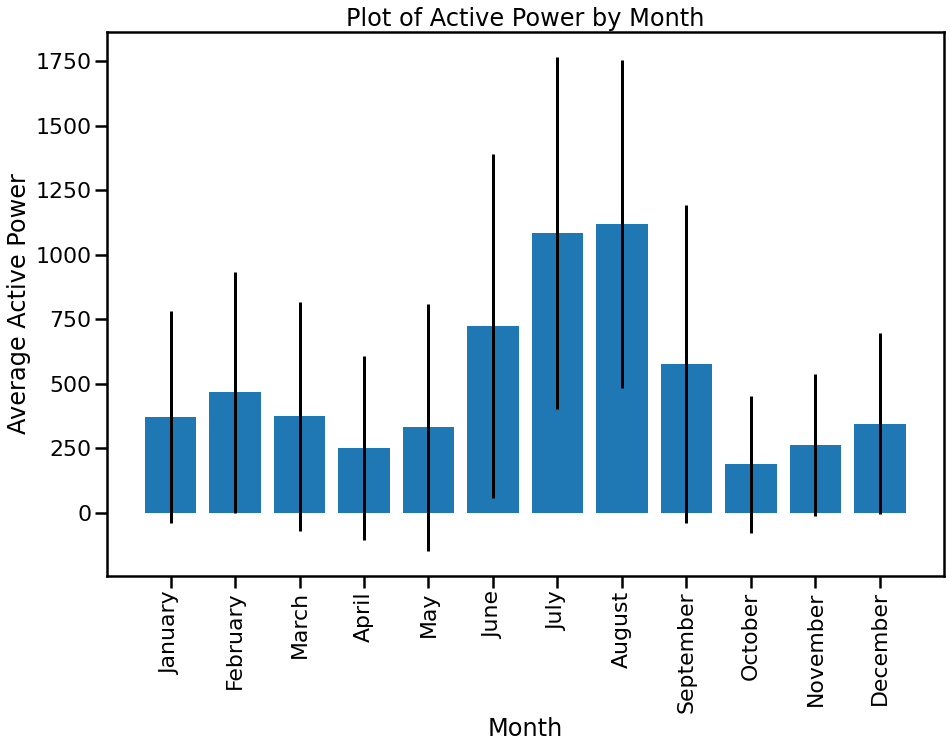

Month1  ActivePower
0     January   371.019868
1    February   465.565990
2       March   372.436891
3       April   250.774731
4         May   330.622515
5        June   721.795308
6        July  1084.943461
7      August  1118.470168
8   September   574.717816
9     October   186.324384
10   November   263.184920
11   December   345.002300

<Figure size 432x288 with 0 Axes>

In [27]:
year_full = turbine_df_full.groupby('Month1').ActivePower.mean().reset_index()
year_std = turbine_df_full.groupby('Month1').ActivePower.std().reset_index()
year_full['Month1'] = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

plt.figure(figsize=(15, 10))
plt.title('Plot of Active Power by Month')
plt.bar(year_full['Month1'],
        year_full['ActivePower'],
        yerr=year_std['ActivePower'])
plt.xlabel('Month')
plt.ylabel('Average Active Power')
plt.xticks(rotation=90)
plt.show()
plt.clf()

year_full

What is interesting from the histogram is the increase in power production in the summer months. There is a clear improvement during June, July, August, and the rest of the year is lower power production. I included the error bars with the standard deviation values. Some of the standard deviations go negative, but for the most part, stay above zero. Like with the other plots, there is a high degree of variability. 

In general, it can be said from the different plots that in June, July, August, from 12:00 PM to 6:00 PM, we can expect to see the highest production of power. 

# The Shape Before the Fitting

Before constructing my predictive functions, I will plot the histograms of the other features before creating a machine learning model. I'll start with the full dataframe features and then go into the half dataframe features. Then I'll do any additional transformations to the data to correct for skew. This will be important to ensure the model doesn't overweigh any one feature being used and allow for a better prediction of the scores. 

**********************************************
This comment has been inserted after doing the work in the next section, "Half Dataframe Analysis." Going through and doing the transformations to normalize the data was heavily skewed by the large spikes at zero. To get a better fit model, I am now going to cleanse this information from the dataset. A machine learning model isn't needed to predict a wind turbine fan not spinning doesn't produce power. This should make for better distributions after the transformation.  
**********************************************

In [28]:
turbine_df_full = turbine_df_full[turbine_df_full['ActivePower'] > 0]
turbine_df_half = turbine_df_half[turbine_df_half['ActivePower'] > 0]

Full Turbine Histograms
4


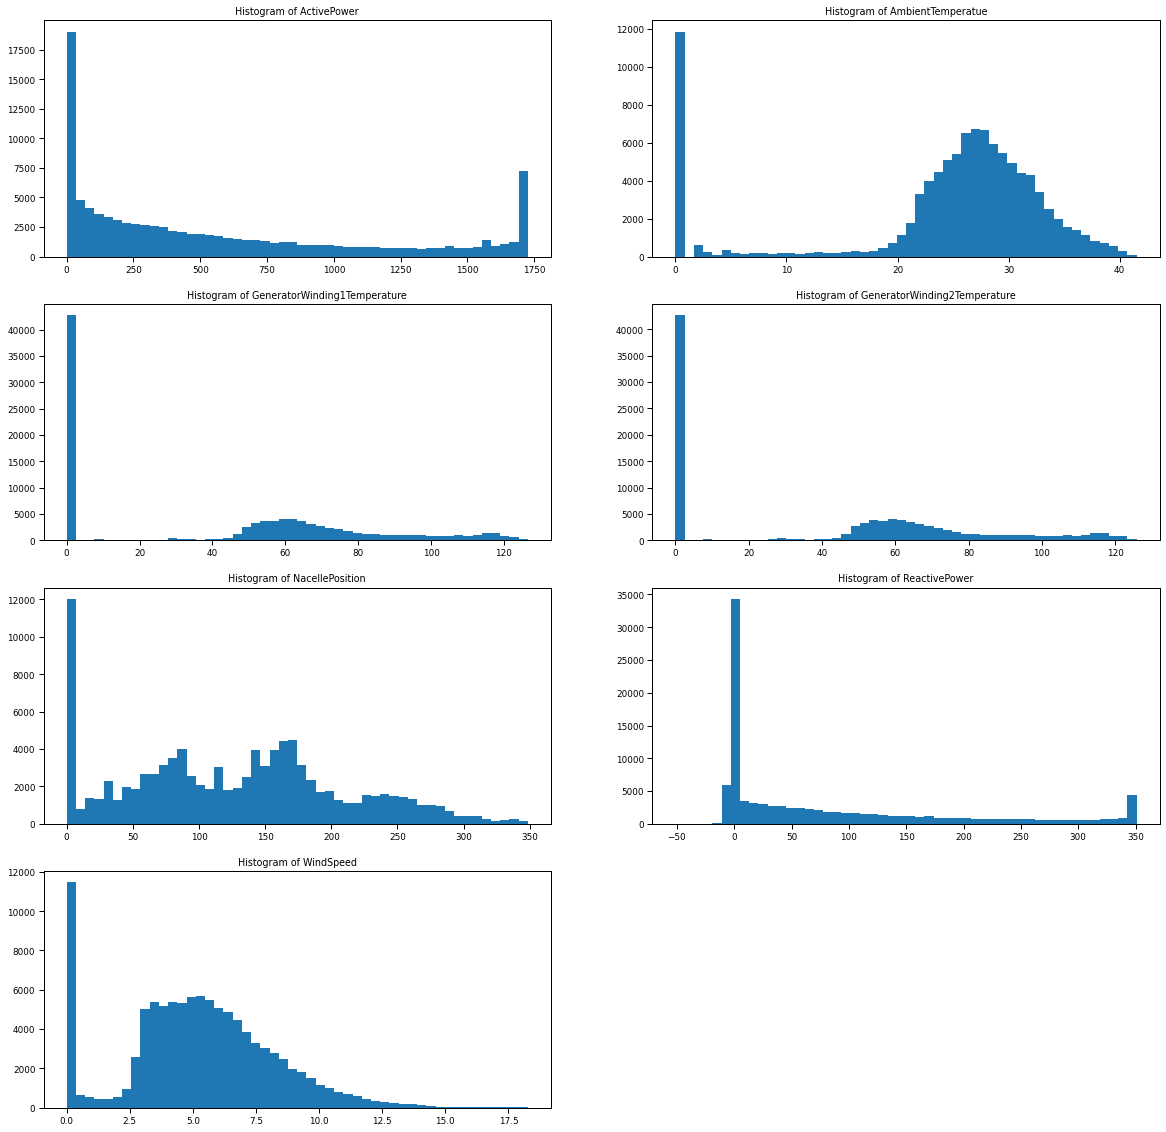

<Figure size 432x288 with 0 Axes>

In [29]:
sub_count = 1  # initialize the count
plt.figure(figsize=(20, 20))  # create a figure to plot into
sns.set_context('paper')  # set context to paper to get the font back to normal

print('Full Turbine Histograms')
print(round(len(features) / 2))


def hist_multi_plot(df, headings):
    sub_count = 1
    for feat in headings:  # loop through the features in full dataframe
        # create each sub plot from the loop
        plt.subplot(round(len(headings) / 2), 2, sub_count)
        plt.hist(df[feat], bins=50)  # plot the histogram of the feature
        plt.title("Histogram of " + feat)  # Add a title
        sub_count += 1  # Update the count of the feature the loop is at
    plt.show()  # show the plot
    plt.clf()  # close the plot for the next step


hist_multi_plot(turbine_df_full, features)

### Full Dataframe Analysis

I'll take everything from the top left to the bottom. The Active Power I covered in detail earlier in the notebook. I won't go over that again. 

The histogram of the ambient temperature is slightly left-skewed. So I'll apply a log transform to shift the distribution left. 

Generator Winding temperature has a substantial spike right at zero. Otherwise, it looks like the distribution is relatively Gaussian. 

I do have a decision to make, and now is a good time to review it. I have several features that have a high spike at zero. I have two options: I can remove all of that data from the data set or leave it in. I anticipate that removing the zero values will result in a better predictive score. I've seen other ML models skew too low in their predictions because data is too heavily skewed toward the zero mark. And why wouldn't it? It has a large volume of values around zero, and it is a good guess that it will be around zero since so many values are there. Otherwise, I could remove zero values only to predict power when the unit is producing. 

So to solve this, I'm going to remove the zero values (or negative values) from the active power output. I'll leave the zero values in for the other features. Then, I'll see how that data frame performs versus one that leaves zero values in the feature. I predict removing the zeros will improve the score, but that is why we run the tests. 

Nacelle position has a roughly normal distribution. That should help with building out the models. 

Reactive power closely mimics active power. This should be because these values are related to the power factor. 

Finally, Wind Speed has an obvious left shift and will need to be processed through a log function to normalize the data better. Gotta love a log shift. 




Half Turbine Histograms


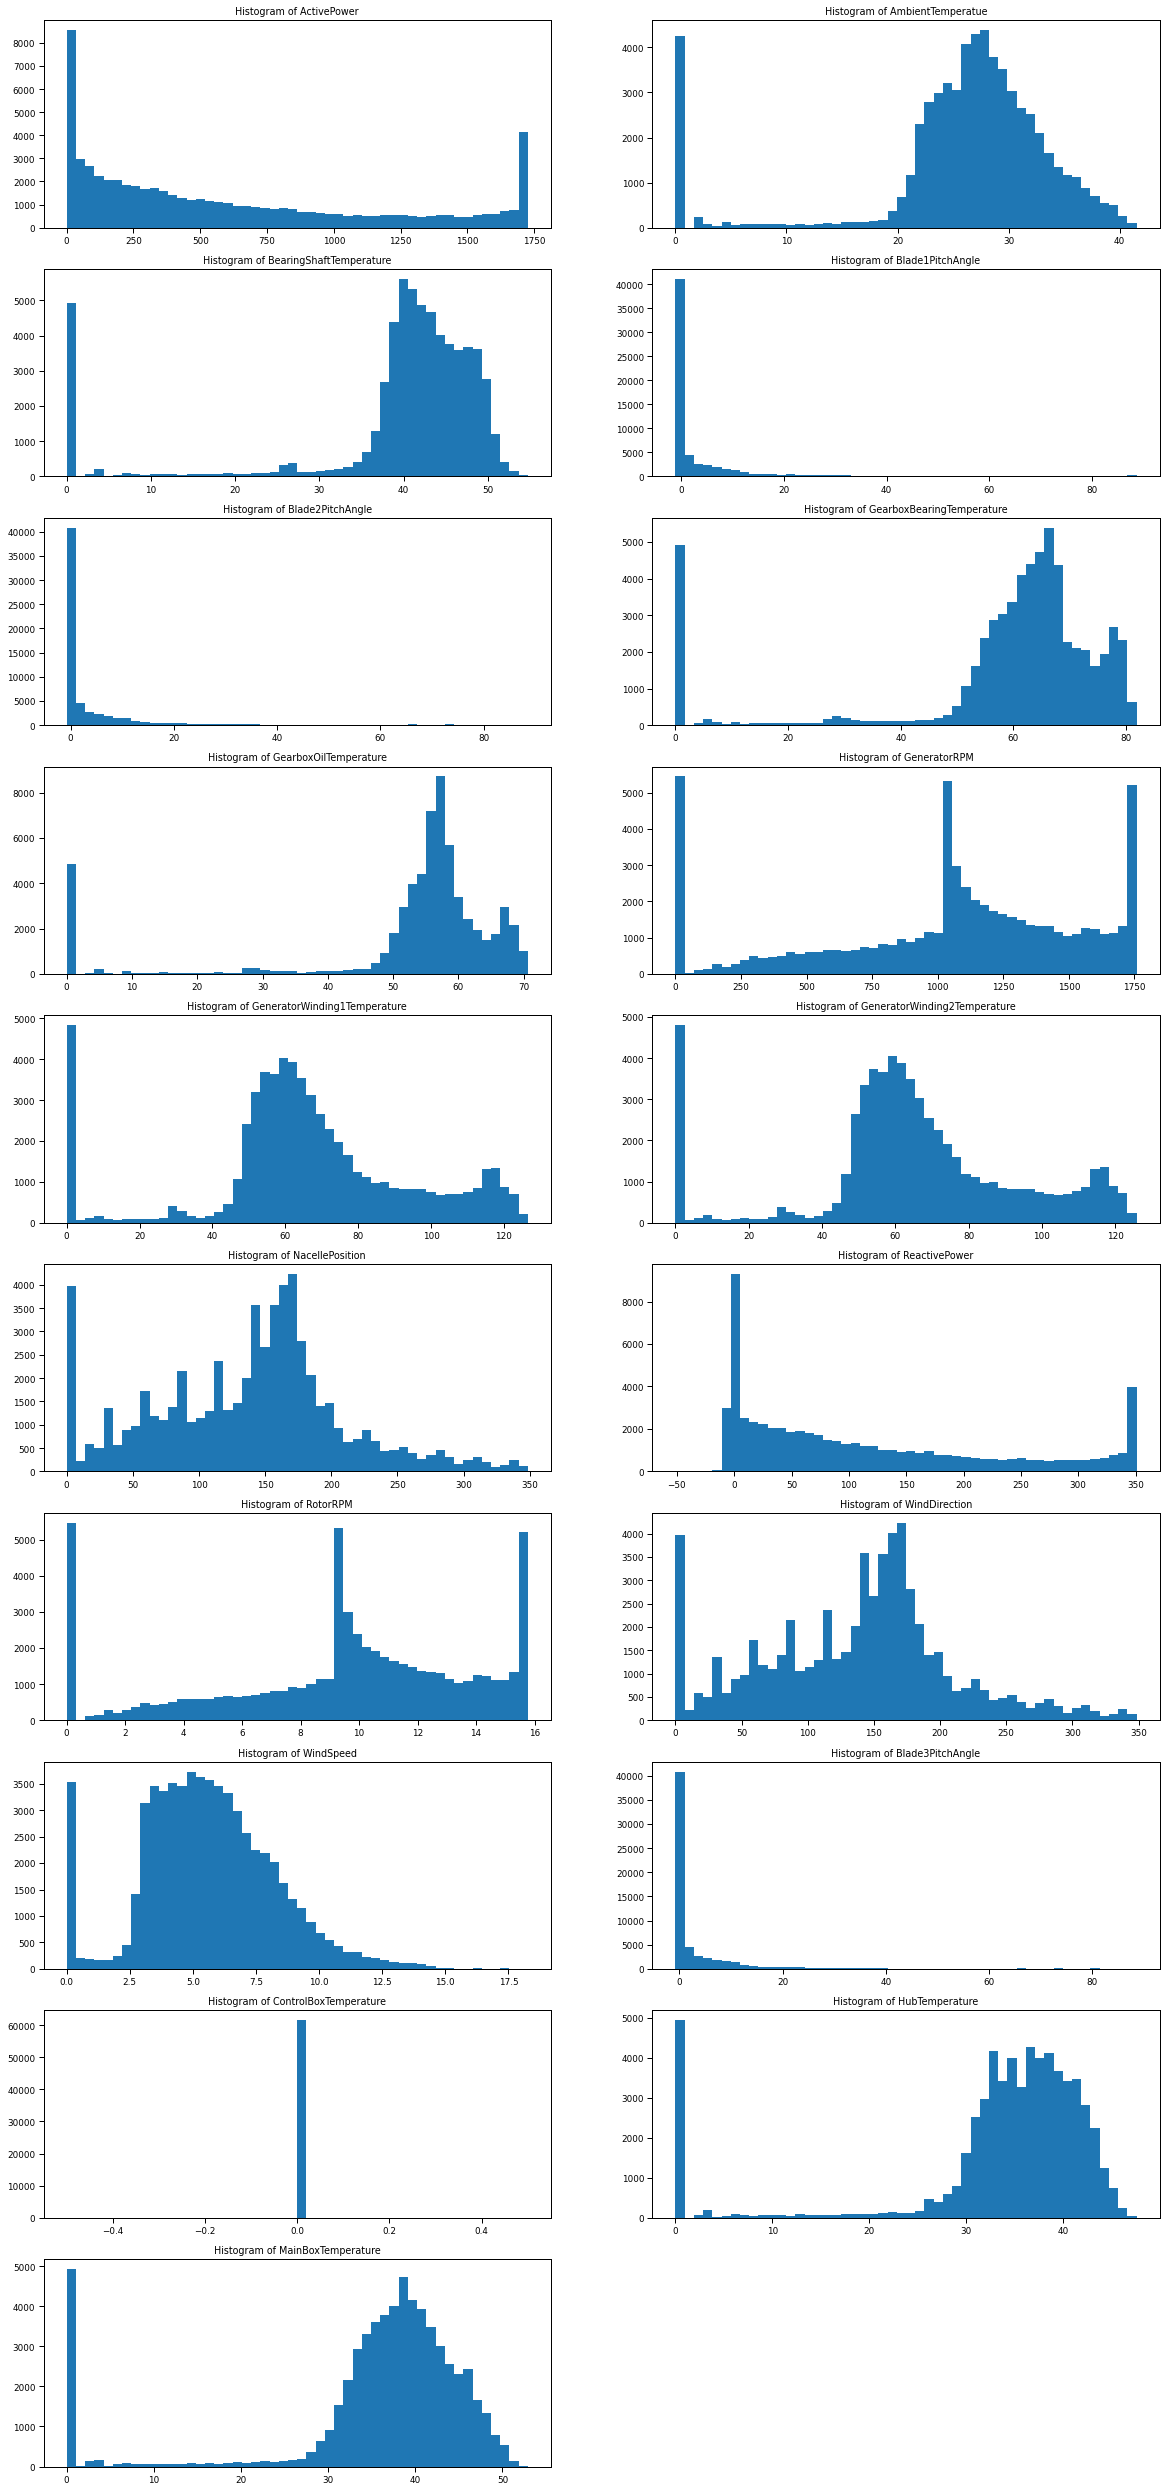

<Figure size 432x288 with 0 Axes>

In [30]:
# Declare new dataframe
print('\n\n\nHalf Turbine Histograms')
plt.figure(figsize=(20, 45))
hist_multi_plot(turbine_df_half, features3)

### Half Dataframe Analysis

Comparing the distributions of the features in the full turbine dataframe are fairly similar to those in the half turbine dataframe. Their reactive power has fewer zero values, but that isn't a major change. Next, I'll further evaluate the features that are not in the full turbine dataframe. 

Blade pitch angle has a similar issue as other histograms, with most of the values at zero. It also looks like some values are negative. I'll remove the negative values from the feature because that will skew the data. I also know that blade position negatively correlates with power production and should have a negligible impact on the final output of power. 

The generator bearing temperature is shifted right on the diagram. It does look to have a decent normal distribution that isn't centered. By doing the right normalization of the data, it should improve the predictive power of the generated power. As with all of this data, it looks like some are corrupt or testing data. Given the temperature isn't normally around zero, I would expect the temperature measurement to be a good representation of ambient temperature. Even when the unit is running, it will reflect ambient temp. I will do a scatter plot of gearbox temperature versus power production to see the average ambient temperature for the system when not running. That may be an interesting result. 

The gearbox oil temperature follows a very similar distribution as the gearbox temperature. This is expected, given that the oil is in the gearbox. As the gearbox heats up, so should the oil. Because I don't have more background on the data, it is difficult for me to distinguish between the measurements of the gearbox temperature and the oil temperature. Further investigation would be needed to determine the points at which measurements are taken. 

The histogram of generator RPM is interesting. If I ignore the zero values, the data looks kind of right shifted. But, it doesn't have a clear distribution. Further work will be needed to clean the data and normalize it. But, this one is a good fit for applying a log transformation. 

Generator RPM has a similar shape as the Active Power histogram. There is a spike at the far right of the histogram and a spike around zero. The way to explain this is the rotor is probably not spinning when there is no wind, and there is probably a maximum rotation speed of the turbine. From the correlation matrix, there is a strong correlation between RPM and Active Power. There may not be much need to shift the data as it has a good normal distribution... excluding the extremes. 

Wind direction surprisingly has a decent distribution. Since the values are based on degrees, there is a solid spike between 180 degrees and 360 degrees. I don't know which cardinal directions the turbine faces, but it is either east/west or north/south for most of the time. There wasn't much correlation between Active Power and wind direction. 

The control box temperature already looks like it has been normalized, or the data wasn't scaled correctly. However, given the spike right around zero, this data doesn't look helpful. Therefore, it will be removed from the final model. 

The hub temperature closely follows gearbox temperature and gearbox oil temperature. However, the correlation between the hub temperature and the gearbox temperatures was only around .5. I may re-run a correlation matrix with the half data to see if the correlation increases. I suspect in the half data; the value will be higher because the histograms are closely correlated. 

The same thing can be said for the main box temperature as the hub temperature. 

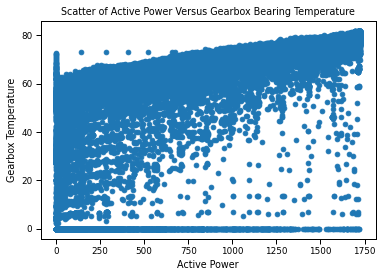

In [31]:
plt.scatter(turbine_df_half['ActivePower'], turbine_df_half['GearboxBearingTemperature'])
plt.title('Scatter of Active Power Versus Gearbox Bearing Temperature')
plt.xlabel('Active Power')
plt.ylabel('Gearbox Temperature')
plt.show()

There is some trend where as the active power goes higher, there is a higher temperature. This is expected as it starts producing more power, there will be more losses from heat. I was hoping for more of a sense of ambient temperature. However, it doesn't look like a clear trend in the data. 

### Data Analysis and Correlation Matrix - Round 2

As with many things, what I have read about data science is that it is interative. Therefore, it is time to do another iteration of data analysis by looking at correlations. I want to see any material improvement in the correlations after the data cleaning I have conducted. 

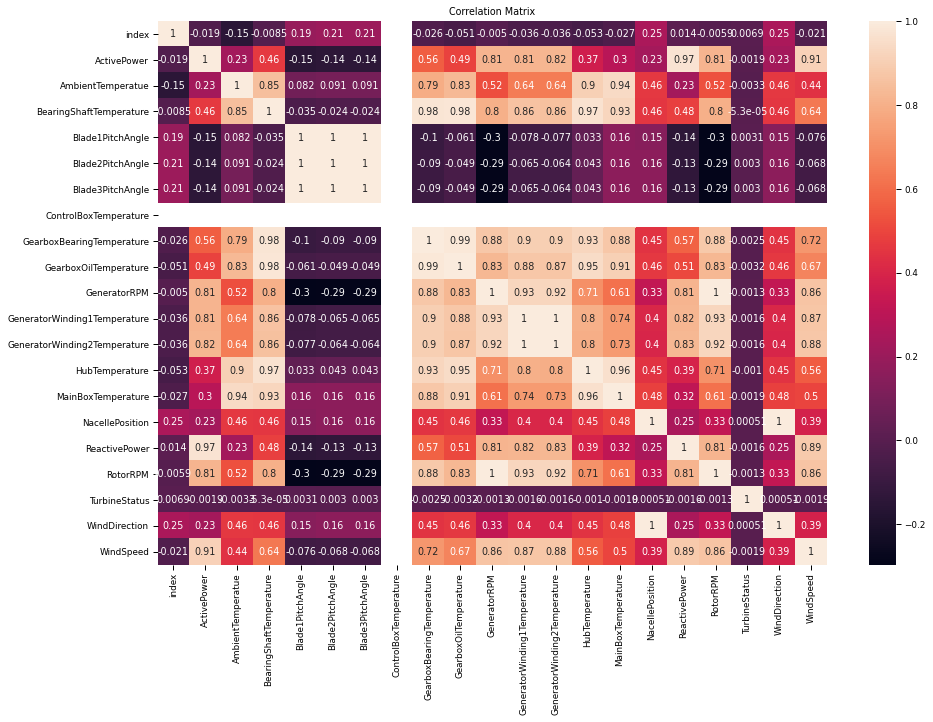

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(turbine_df_half.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()

Looking at the values from the previous correlation matrix, it appears that the scores have reduced slightly for the correlation. This could be because earlier, I did not include weighted trends in the NAN data. This could slightly decrease the score from the weighted average being off. Otherwise, I do not see any significant shifts in the correlation matrix from splicing the data when other values are filled in. 

# Feature Engineering

In the prior section, I talked about some clean-up work that needs to be done on the data. Things like normalizing the data and creating different dataframes with and without the extreme data steel need completion. I will start by applying a Box-Cox transformation to the data that did not seem normal. I'll use the Box-Cox method of normalizing the data and check the distributions for normalization. 

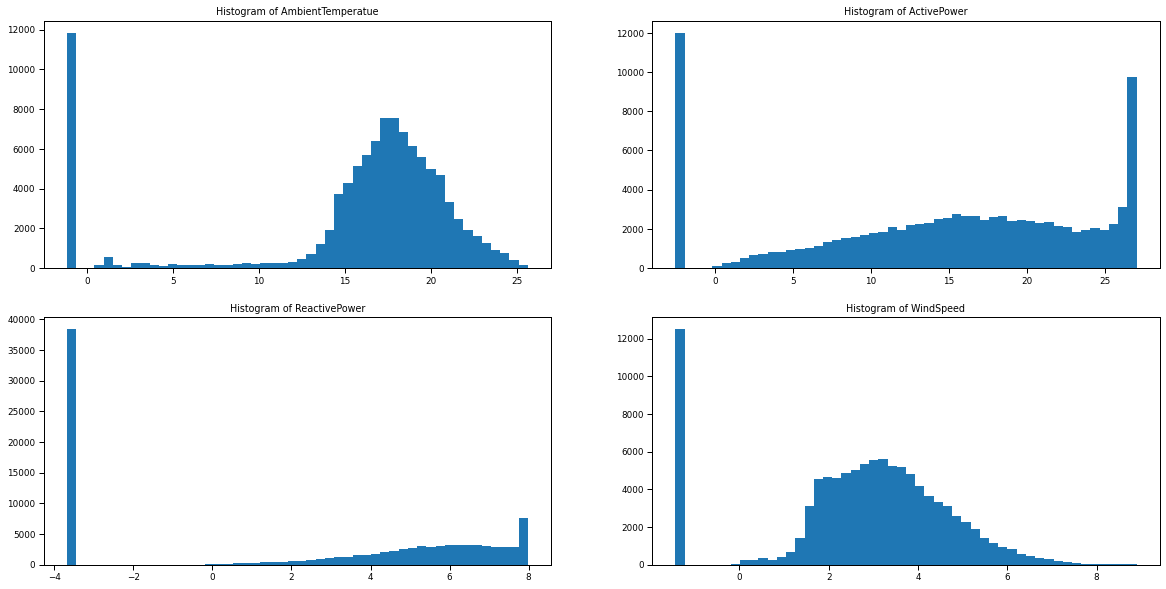

<Figure size 432x288 with 0 Axes>

In [33]:
Box_Cox_Full = [
    'AmbientTemperatue', 'ActivePower', 'ReactivePower', 'WindSpeed'
]
turbine_df_full_norm = turbine_df_full
# to run box cox, the data needs to be positive.
# For the full turbine df, there are negative values in reactive power. That data will be cleansed.
# To handle the negative values, I will turn them into zeros.
# msno.matrix(turbine_df_full)

for feat in Box_Cox_Full:
    turbine_df_full_norm[feat] = turbine_df_full_norm[feat].apply(
        lambda value: .01 if value < 1 else value)
    # print(turbine_df_full)
    turbine_df_full_norm[feat], box_lambda = stats.boxcox(
        turbine_df_full_norm[feat])

plt.figure(figsize=(20, 10))
hist_multi_plot(turbine_df_full_norm, Box_Cox_Full)

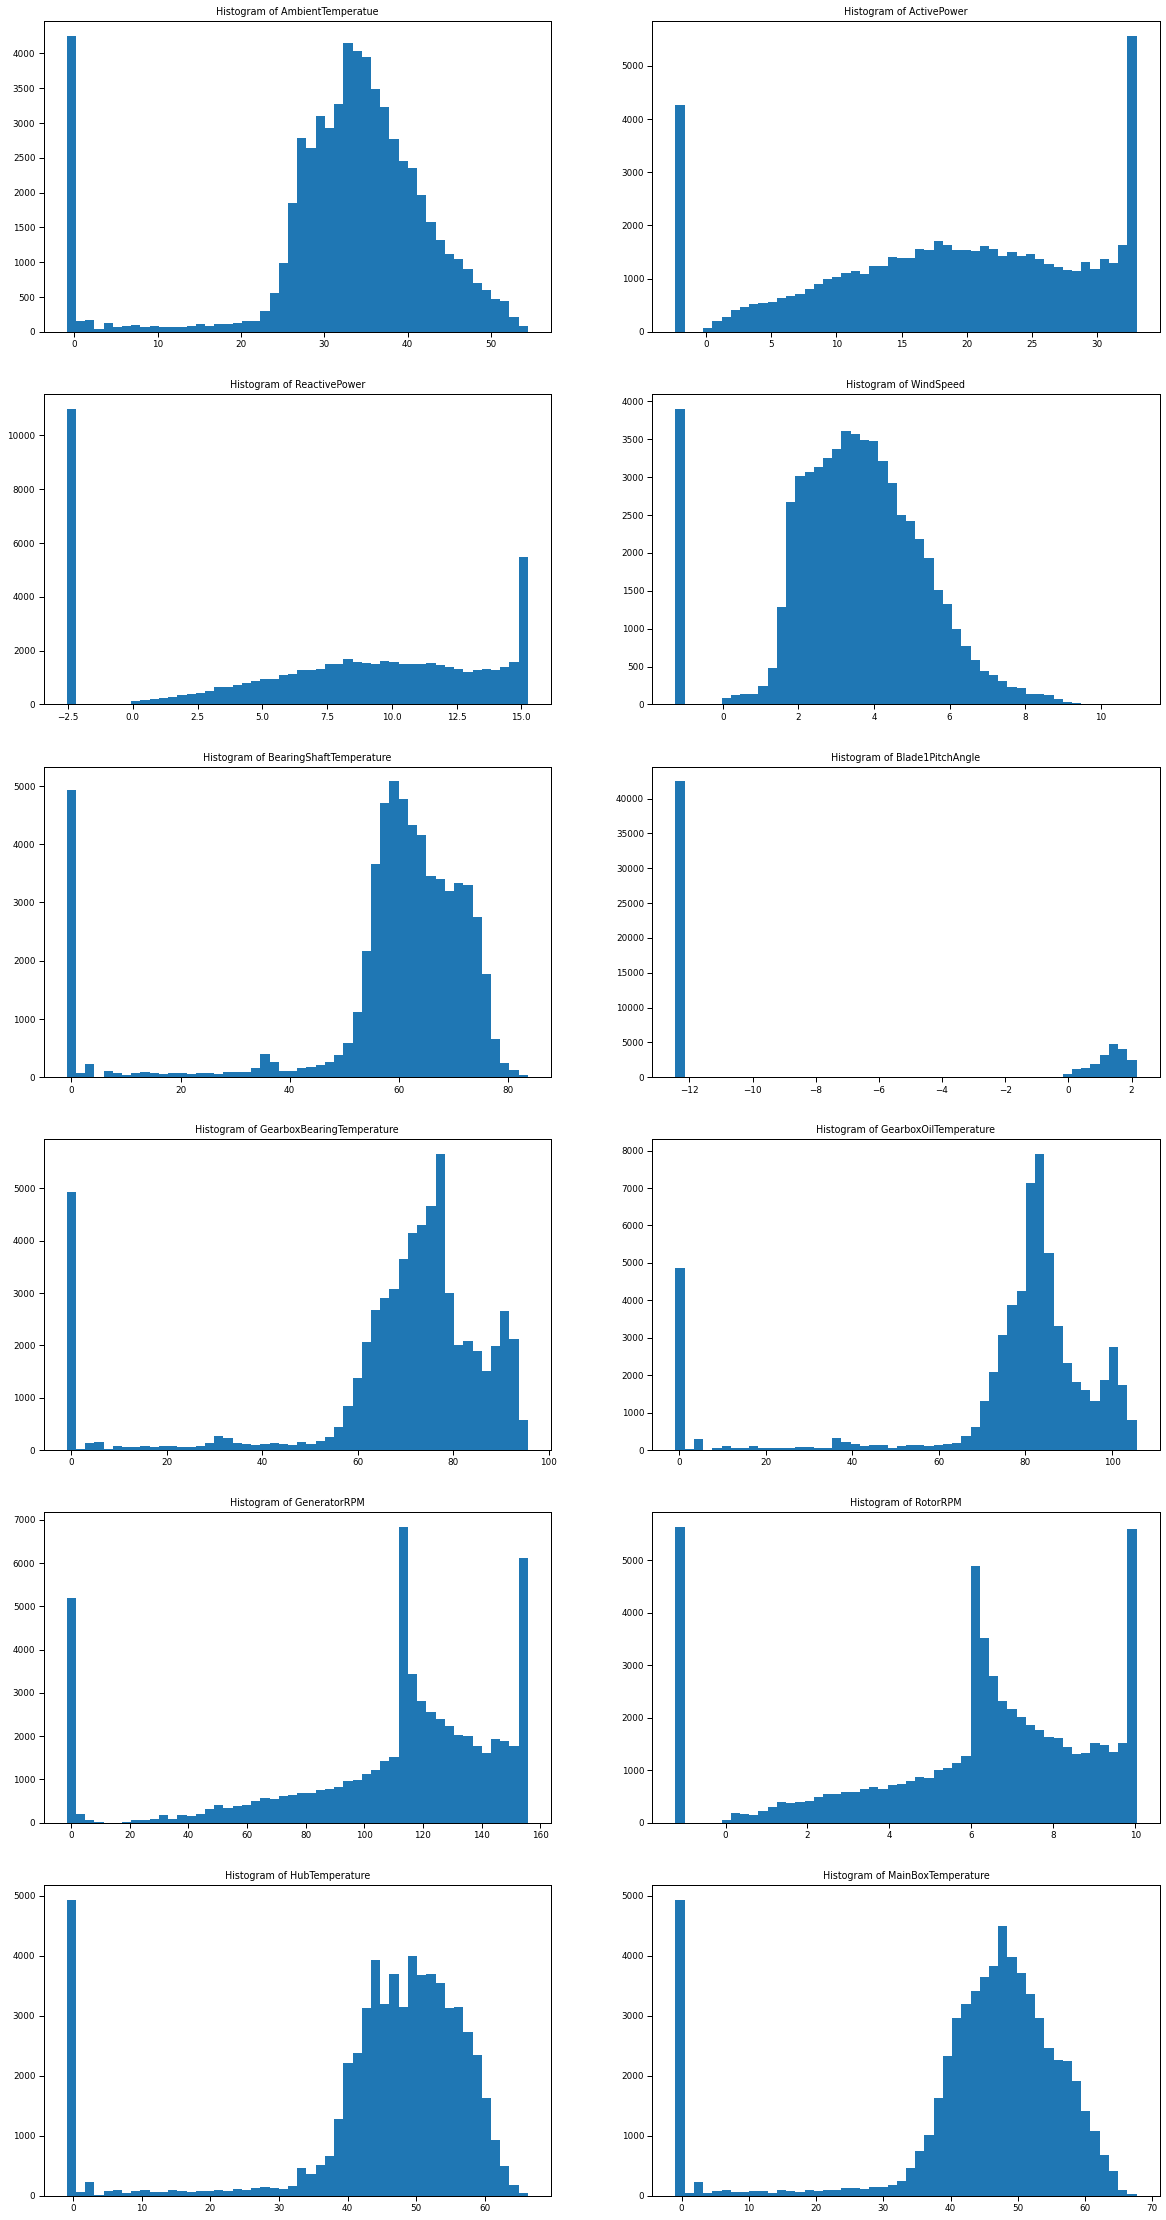

<Figure size 432x288 with 0 Axes>

In [34]:
Box_Cox_Half = [
    'AmbientTemperatue', 'ActivePower', 'ReactivePower', 'WindSpeed',
    'BearingShaftTemperature', 'Blade1PitchAngle', 'GearboxBearingTemperature',
    'GearboxOilTemperature', 'GeneratorRPM', 'RotorRPM', 'HubTemperature',
    'MainBoxTemperature'
]
turbine_df_half_norm = turbine_df_half
box_lambda = 0

for feat in Box_Cox_Half:
    # print(feat)
    turbine_df_half_norm[feat] = turbine_df_half[feat].apply(
        lambda value: .01 if value < 1 else value)
    # print(turbine_df_full)
    turbine_df_half_norm[feat], box_lambda = stats.boxcox(
        turbine_df_half_norm[feat])

plt.figure(figsize=(20, 40))
hist_multi_plot(turbine_df_half_norm, Box_Cox_Half)

So there is some improvement in the histogram distributions. Generator and rotor RPM are both still right-shifted, but it is an improvement compared to before. There are still spikes at zero and the maximum values, that may result in weird predictions in my machine learning algorithm. I'll normalize the data using a Z score to smooth out the extremes in the data, hopefully. As I go through the machine learning models, I will see what predictive scores I get. I may need to filter out the zero values for my features to improve my predictive model. 

I removed blade angle pitch as the histogram after normalization looks binary. The value was slightly negatively correlated and shouldn't have as much impact on the final results. 

In [35]:
Box_Cox_Half = [
    'AmbientTemperatue', 'ActivePower', 'ReactivePower', 'WindSpeed',
    'BearingShaftTemperature', 'GearboxBearingTemperature',
    'GearboxOilTemperature', 'GeneratorRPM', 'RotorRPM', 'HubTemperature',
    'MainBoxTemperature'
]
turbine_df_full_normed = turbine_df_full_norm[Box_Cox_Full].apply(zscore)
turbine_df_half_normed = turbine_df_half_norm[Box_Cox_Half].apply(zscore)
turbine_df_full_normed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101965 entries, 173 to 118223
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AmbientTemperatue  101965 non-null  float64
 1   ActivePower        101965 non-null  float64
 2   ReactivePower      101965 non-null  float64
 3   WindSpeed          101965 non-null  float64
dtypes: float64(4)
memory usage: 3.9 MB


# The Machine Learning Model

Now that I have normalized the data, I can start building machine learning models. I am going to create some testing and training data for both full and half dataframes. I will then test different machine learning approaches to see which one best predicts the active power. 

## Linear Regression

In [36]:
#turbine_df_full_normed = turbine_df_full_normed.reshape((100,3))
# create array of features for prediction
def linear_regression(df, x_array, y_feature):

    x = df[x_array]  # create the x variable with the features
    # create the y variable with the primary feature
    y = df[y_feature]

    # split data 80% predicting and 20% testing
    x_train, x_test, y_train, y_test = train_test_split(x,
                                                        y,
                                                        train_size=0.8,
                                                        test_size=0.2)

    mlr = LinearRegression()  # create linear regression model
    mlr.fit(x_train, y_train)  # fit the model with the training data
    print('Predictive score of: ', mlr.score(
        x_test, y_test))  # find the test score
    coeff_values = mlr.coef_  # pass the coefficients into an array
    # print(coeff_values) # uncomment to see the full array of coefficients
    for i in range(len(x_array)):
        # loop through an array of features and the score
        print(x_array[i], " :", coeff_values[0][i])


x_features1 = ['AmbientTemperatue', 'ReactivePower', 'WindSpeed']
y_features1 = ['ActivePower']
linear_regression(turbine_df_full_normed, x_features1, y_features1)

Predictive score of:  0.872484916717835
AmbientTemperatue  : -0.15583612365486574
ReactivePower  : 0.11023594131192405
WindSpeed  : 0.9753590570496964


So right off the bat, linear regression seems to have a decent fit with the data. A score of ~.88 is fairly high. What does that mean? Basically, of 9 out of ten times, it will have a strong fit. 

Based on the coefficients, wind speed is the strongest predictor of power output. This isn't that surprising, given the spinning of the blade is what produces the power. Now let's see if linear regression will further improve with adding the additional features. 

In [37]:
x_features2 = ['AmbientTemperatue', 'ReactivePower', 'WindSpeed',
               'BearingShaftTemperature', 'GearboxBearingTemperature',
               'GearboxOilTemperature', 'GeneratorRPM', 'RotorRPM', 'HubTemperature',
               'MainBoxTemperature'
               ]
y_features2 = ['ActivePower']

linear_regression(turbine_df_half_normed, x_features2, y_features2)

Predictive score of:  0.95521621232916
AmbientTemperatue  : 0.2829837806152958
ReactivePower  : 0.2726899890550052
WindSpeed  : 0.542394785307533
BearingShaftTemperature  : 0.08798963524845063
GearboxBearingTemperature  : 0.14955982291413408
GearboxOilTemperature  : -0.4228438559435964
GeneratorRPM  : 0.2371386614460455
RotorRPM  : 0.22326636886467205
HubTemperature  : -0.09175515059412666
MainBoxTemperature  : -0.3196445272267264


So looking at the half DataFrame, the generator RPM and Wind Speed dominate the features that predict power produced. Ambient temperature and reactive power have some influence on the outcome. 

The predictive score has gone even higher to .95! That is a robust predictive score of the expected values. I will see if I can get that score a little higher by using only Wind Speed and Generator RPM. I'll also try one with Wind Speed, Generator RPM, Reactive Power, and Ambient Temperature. (I realize the temperature is spelled wrong in the variable. I just didn't take the time to correct it)

In [38]:
print('First Attempt: \n')
x_features3 = ['WindSpeed', 'GeneratorRPM']
y_features3 = ['ActivePower']

linear_regression(turbine_df_half_normed, x_features3, y_features3)

print('\n\nSecond Attempt: \n')
x_features4 = ['AmbientTemperatue',
               'ReactivePower', 'WindSpeed', 'GeneratorRPM']
y_features4 = ['ActivePower']

linear_regression(turbine_df_half_normed, x_features4, y_features4)

First Attempt: 

Predictive score of:  0.8783653752213233
WindSpeed  : 0.7418392311396289
GeneratorRPM  : 0.2279086792848173


Second Attempt: 

Predictive score of:  0.9322116253968475
AmbientTemperatue  : -0.12895775450068295
ReactivePower  : 0.32780670062337824
WindSpeed  : 0.5680591384593667
GeneratorRPM  : 0.18172585400688074


So by changing some of the features, I don't get a better score. Looks like .95 is the best score. 

## Random Forest Regressor

I'll now try a random forest regressor and see if I can improve upon the linear regression model. 

In [39]:
# move the train_test_split outside of the function to speed it up a bit and add progress counter

x_full = turbine_df_full_normed[
    x_features1]  # create the x variable with the features
# create the y variable with the primary feature
y_full = turbine_df_full_normed[y_features1]

# split data 80% predicting and 20% testing
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
    x_full, y_full, train_size=0.8, test_size=0.2)


def Forest_Regressor(df, x_train, x_test, y_train, y_test, estimators):

    rf = RandomForestRegressor(n_estimators=estimators, random_state=42)
    rf.fit(x_train, np.ravel(
        y_train))  # use ravel to adjust vector to 1D array for function call
    return rf.score(x_test, y_test)


score = [
]  # Note that this formula takes a while to loop through the different estimators
for i in range(100, 2000, 100):
    score.append(
        Forest_Regressor(turbine_df_full_normed, x_train_full, x_test_full,
                         y_train_full, y_test_full, i))
    print('progress: ', i / 2000)

#print(score) #remove comment to see full array of scores

progress:  0.05
progress:  0.1
progress:  0.15
progress:  0.2
progress:  0.25
progress:  0.3
progress:  0.35
progress:  0.4
progress:  0.45
progress:  0.5
progress:  0.55
progress:  0.6
progress:  0.65
progress:  0.7
progress:  0.75
progress:  0.8
progress:  0.85
progress:  0.9
progress:  0.95
[0.9721908003004321, 0.972256930732116, 0.9722855524895126, 0.9723085242492908, 0.97231096444781, 0.9723066971778614, 0.9722849591560161, 0.9722958392825052, 0.9722822455355284, 0.9722778101872688, 0.9722926822341302, 0.9723010255672164, 0.9723053548298592, 0.9723024608402511, 0.9722929602556863, 0.9722792523658291, 0.972289371657926, 0.9722899607545099, 0.9722967868010465]


0.97231096444781


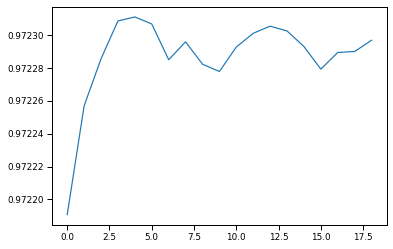

In [40]:
print(np.max(score))
plt.plot(score)

In [41]:
# create the x variable with the features
x_half = turbine_df_half_normed[x_features2]
# create the y variable with the primary feature
y_half = turbine_df_half_normed[y_features2]

# split data 80% predicting and 20% testing
x_train_half, x_test_half, y_train_half, y_test_half = train_test_split(x_half,
                                                                        y_half,
                                                                        train_size=0.8,
                                                                        test_size=0.2)

score = []
for i in range(100, 2000, 100):
    score.append(Forest_Regressor(turbine_df_half_normed,
                                  x_train_half, x_test_half, y_train_half, y_test_half, i))
    print('progress: ', i/2000)

progress:  0.05
progress:  0.1
progress:  0.15
progress:  0.2
progress:  0.25
progress:  0.3
progress:  0.35
progress:  0.4
progress:  0.45
progress:  0.5
progress:  0.55
progress:  0.6
progress:  0.65
progress:  0.7
progress:  0.75
progress:  0.8
progress:  0.85
progress:  0.9
progress:  0.95


0.9956262667062027


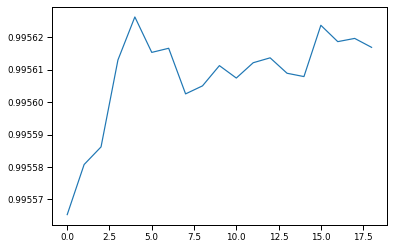

In [42]:
print(np.max(score))
plt.plot(score)

With the different levels of forests, the best score I get is .973. This is higher than any of the scores I got using linear regression. The random forest does not have a clean method for classifying or weighting the features that matter most. I can say that the random forest created a high score, meaning the formula has strong predictive capabilities. 

Now I will try to use KNN regression and see how the score compares to the prior methods.

## KNN Regressor

The approach to this method will be similar to the prior approaches. First, I'll create a test and train groups, then run it through the KNN regressor. I'll then see if there is a number of neighbors that optimizes the score.

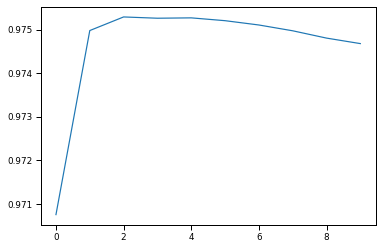

In [43]:
# create the x variable with the features
x = turbine_df_full_normed[x_features1]
# create the y variable with the primary feature
y = turbine_df_full_normed[y_features1]

# split data 80% predicting and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2)

KNN_Score = []
for i in range(5, 200, 20):
    reg = KNeighborsRegressor(n_neighbors=i, weights='distance')
    reg.fit(x_train, y_train)
    KNN_Score.append(reg.score(x_test, y_test))
    # print(i/200*100)

plt.plot(KNN_Score)

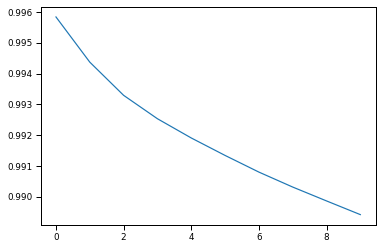

0.9958355918423029


In [44]:
# create the x variable with the features
x = turbine_df_half_normed[x_features2]
# create the y variable with the primary feature
y = turbine_df_half_normed[y_features2]

# split data 80% predicting and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2)

KNN_Score = []
for i in range(5, 200, 20):
    reg = KNeighborsRegressor(n_neighbors=i, weights='distance')
    reg.fit(x_train, y_train)
    KNN_Score.append(reg.score(x_test, y_test))
    # print(i/200*100)

plt.plot(KNN_Score)
plt.show()
print(np.max(KNN_Score))

# Wind and Ambient Temperature Attempt

The scope of the original request was to predict the power output of the data for 14 days out. Without weather data as part of the data set, it is hard to develop a fourteen-day prediction. While the above scores did have impressively high values, most of the data being used is internal to the machine. In reality, the only two values that matter from this dataset are ambient temperature and wind speed to predict the power output. I'll do one more run with each machine learning model to see the highest score with those two inputs. 

In this run, I am only focused on the full dataframe values for this round. This is because the wind and ambient temperature data covered the full data set and wasn't part of the halved data. Put another way; these values have a lot of data. From the last histogram, there is a very similar shape to the data when it is halved. Plus, the models will perform better with more data. 

In [45]:
x = turbine_df_full_normed[['WindSpeed', 'AmbientTemperatue']]
y = turbine_df_full_normed['ActivePower']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2)
print('Linear Regression: ')
linear_regression(turbine_df_full_normed, [
                  'WindSpeed', 'AmbientTemperatue'], ['ActivePower'])

print('\n\nRandom Forest : ')
# create regressor with 1000 n_estimators
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
# use ravel to adjust vector to 1D array for function call
rf.fit(x_train, np.ravel(y_train))
# print out the score of the random forest
print('Predictive Score of : ', rf.score(x_test, y_test))

print('\n\nKNeighborsRegressor: ')
# Create regressor with 100 neighbors
reg = KNeighborsRegressor(n_neighbors=100, weights='distance')
reg.fit(x_train, y_train)  # create a model to test the data
# get the R^2 score for the test data
print('Predictive Score of : ', reg.score(x_test, y_test))

Linear Regression: 
Predictive score of:  0.8567270011968438
WindSpeed  : 1.0329593733124616
AmbientTemperatue  : -0.15290142317258645


Random Forest : 
Predictive Score of :  0.9551936211034502


KNeighborsRegressor: 
Predictive Score of :  0.9603226097180023


# Conclusions

So as a very high-level comment, there are some very high scores predicting the reactive power. If wind and temperature models can give good predictions for many days, these machine learning models could predict the power output with about 96% accuracy. 

As an overview, I took the data for the wind turbine and started by filling in missing data with an exponential decay function. From there, I split the data in half as the first half of the data was mostly blank. The second half of the data had a lot more non-zero values or 'NaN' values. 

I did a digression creating plots and heat maps looking at different time frames to develop a sense of how the power is produced over time. While the algorithm in its present form doesn't take into account month, day, or hour. But, it was interesting to explore how the power changes over time. 

From there, I made the assumption that power output at zero will have the other values as zero. I threw out the zero values for power output. I then normalized the data to make sure anyone feature didn't overpower the 

Finally, I built different machine learning models to predict the power output. The best-predicted value using all of the data was 99%. That seems so high I almost don't believe it, but checking the math, it checks out. I also got scores of about 96% using only temperature and wind speed.  

I didn't do the work to unscale the values to have an output with actual values instead of the scaled values. There can be further exploration of the relation of other values beyond the output power to develop a maintenance algorithm. This is beyond the scope of this analysis, but the data present could start a maintenance model. 
Further work could be done to refine my analysis of the range of the power output by month. Some of the range goes negative and could be further cleaned up. 